In [1]:
import numpy as np
import matplotlib as plt
from hilp import load_csv_data
from helper import *
from costs import *
from least_squares import *
from ridge_regression import *
from logistic_regression import *

In [2]:
yb, input_data, ids = load_csv_data('data/train.csv')

In [3]:
input_data.shape

(250000, 30)

In [4]:
cleaned_columns = [c for c in input_data.T if (c==-999).sum()/len(c) < 0.2]
print(np.shape(cleaned_columns))
for c in cleaned_columns:
    numb_of_nan = (c==-999).sum()
    median = np.median(list(filter(lambda x : x!= -999, c)))
    c[c == -999] = median

(20, 250000)


In [5]:
cleaned_columns

[array([138.47 , 160.937, 112.406, ..., 105.457,  94.951, 112.406]),
 array([ 51.655,  68.768, 162.172, ...,  60.526,  19.362,  72.756]),
 array([ 97.827, 103.235, 125.953, ...,  75.839,  68.812,  70.831]),
 array([27.98 , 48.146, 35.635, ..., 39.757, 13.504,  7.479]),
 array([3.064, 3.473, 3.148, ..., 2.39 , 3.365, 2.025]),
 array([41.928,  2.078,  9.336, ..., 22.183, 13.504,  7.479]),
 array([197.76 , 125.157, 197.814, ..., 120.462,  55.859,  83.24 ]),
 array([1.582, 0.879, 3.776, ..., 1.202, 0.999, 0.936]),
 array([ 1.396,  1.414,  1.414, ...,  0.529,  1.414, -1.411]),
 array([32.638, 42.014, 32.154, ..., 35.636, 27.944, 43.003]),
 array([ 1.017,  2.039, -0.705, ..., -0.266, -2.211,  1.685]),
 array([ 0.381, -3.011, -2.093, ..., -3.132,  2.792,  2.653]),
 array([ 51.626,  36.918, 121.409, ...,  42.834,  27.915,  40.236]),
 array([ 2.273,  0.501, -0.953, ...,  0.381, -0.874,  1.49 ]),
 array([-2.414,  0.103,  1.052, ...,  0.851, -0.296,  0.637]),
 array([16.824, 44.704, 54.283, ..., 

In [6]:
initial_w = np.random.randint(0,1,len(cleaned_columns))
batch_size = 1
max_iters = 20
#gamma = 0.01
lambda_ = 0.01

In [7]:
gammas = [0.001, 0.002, 0.005, 0.01, 0.02, 0.03]

In [8]:
# standardize the data
std_data, mean, std = standardize(np.transpose(cleaned_columns))

In [9]:
# build the model (add 1's for the w0)
tx, y = build_model_data(std_data, yb)

In [ ]:
l = []
W = []
for gamma in gammas:
    loss, ws = gradient_descent(y, tx, initial_w, max_iters, gamma)
    l.append(loss[max_iters-1])
    W.append(ws)
best_loss = min(l)
ind = l.index(best_loss)
print("best loss :" + str(best_loss)+ " " + str(gammas[ind]) +" \n "+ str(W[ind]))

In [12]:
stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma)

SGD iter. 0/19: loss=0.5, w0=0.03, w1=0.03017918643569754
SGD iter. 1/19: loss=0.9229100967786545, w0=-0.009705064918780183, w1=-0.004663240736245754
SGD iter. 2/19: loss=0.6399740929166161, w0=-0.002661443954838913, w1=0.0036358678329791016
SGD iter. 3/19: loss=0.7645522196061143, w0=0.006098844224092026, w1=0.014351063696840338
SGD iter. 4/19: loss=0.9041656377049222, w0=0.022515681858204153, w1=0.03440532353838178
SGD iter. 5/19: loss=1.1171880488022574, w0=-0.01027217158835007, w1=0.005245185109580022
SGD iter. 6/19: loss=0.9223599870931383, w0=0.015437015269327371, w1=0.02780579475902592
SGD iter. 7/19: loss=1.1910645413632905, w0=-0.013368068346780511, w1=0.0025284395871102427
SGD iter. 8/19: loss=1.0458314872351304, w0=-0.05908932583930209, w1=-0.0497475569083414
SGD iter. 9/19: loss=0.5407527197873756, w0=-0.11157884554518674, w1=-0.06331782154975882
SGD iter. 10/19: loss=0.7819871023513536, w0=-0.04876698401679484, w1=0.04302768727108648
SGD iter. 11/19: loss=5.172503282661993

([0.5,
  0.9229100967786545,
  0.6399740929166161,
  0.7645522196061143,
  0.9041656377049222,
  1.1171880488022574,
  0.9223599870931383,
  1.1910645413632905,
  1.0458314872351304,
  0.5407527197873756,
  0.7819871023513536,
  5.172503282661993,
  4.640593133892575,
  3.2478541097268745,
  3.8442651672131416,
  3.5254021363072137,
  1.5993450971762317,
  0.7640233116621199,
  0.7682807018754992,
  0.9304503932592871],
 [array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  array([ 0.03      ,  0.03017919, -0.01049198,  0.00167854,  0.06166404,
         -0.0171028 , -0.00703534,  0.08554633, -0.01734664, -0.01739783,
          0.00023626, -0.01780812, -0.01745996, -0.00615184, -0.01829813,
         -0.01752521,  0.03283282, -0.01740916,  0.14134448, -0.01681599,
          0.05626691]),
  array([-0.00970506, -0.00466324, -0.02956234, -0.04475465,  0.06534441,
          0.00422022,  0.01594262,  0.06132705,  0.00520777,  0.00638847,
          0.01188256,  0.00624969,

In [13]:
least_squares(y, tx)

(array([ 2.95137215e+02,  1.64125594e-02, -5.66315112e-01, -5.06641813e-01,
         4.81722734e-03,  2.78021755e+01, -1.39849015e-01, -2.39440384e+02,
        -1.76046142e+01,  8.44767115e+00,  2.40099930e+02, -5.66366907e-02,
        -3.61739715e-02,  2.40467040e+02, -3.75756920e-02,  9.84796412e-02,
         2.46397753e-01,  3.50785025e-02, -4.26087024e-02,  6.56880260e+00,
         2.39396437e+02]),
 0.3524927958636052)

In [14]:
ridge_regression(y, tx, lambda_)

array([-0.08441931,  0.07796364, -0.63864758, -0.09861935,  0.07178693,
        0.08681586, -0.07426362,  0.14507038,  0.02372936,  0.1226225 ,
        0.37526345,  0.04789182,  0.04381124,  0.01369728,  0.04816825,
        0.05241047,  0.05438705,  0.04991389, -0.03574803,  0.0640392 ,
       -0.14485184])

In [15]:
logistic_regression(y, tx, initial_w, max_iters, gamma)

Logistic regression iter. 0/19: loss=-48754.730509484805, w0=-0.048879839999999994, w1=-0.04695973632452501
Logistic regression iter. 1/19: loss=-35707.24449313245, w0=-0.08985714268353152, w1=-0.08554133505336953
Logistic regression iter. 2/19: loss=-27400.740608232303, w0=-0.12557639870454806, w1=-0.11870400741611611
Logistic regression iter. 3/19: loss=-21668.50599601481, w0=-0.15768922238301664, w1=-0.14825707584077008
Logistic regression iter. 4/19: loss=-17495.7892064634, w0=-0.1871999402570617, w1=-0.17527031963985346
Logistic regression iter. 5/19: loss=-14342.976646977268, w0=-0.21475873152825634, w1=-0.20041883217887124
Logistic regression iter. 6/19: loss=-11894.873501409907, w0=-0.2408104444433073, w1=-0.2241542070951057
Logistic regression iter. 7/19: loss=-9954.147865209428, w0=-0.2656728388295577, w1=-0.2467926323454867
Logistic regression iter. 8/19: loss=-8390.53641002046, w0=-0.2895806336480255, w1=-0.26856351577779847
Logistic regression iter. 9/19: loss=-7114.384379

([-48754.730509484805,
  -35707.24449313245,
  -27400.740608232303,
  -21668.50599601481,
  -17495.7892064634,
  -14342.976646977268,
  -11894.873501409907,
  -9954.147865209428,
  -8390.53641002046,
  -7114.384379808029,
  -6061.870217468984,
  -5186.282445945543,
  -4452.6291641406415,
  -3834.1773874662094,
  -3310.1580823805384,
  -2864.2010657928963,
  -2483.2412669871364,
  -2156.7377523566697,
  -1876.105290579835,
  -1634.2934553523055],
 [array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  array([-0.04887984, -0.04695974, -0.01189169, -0.02343984,  0.00090263,
          0.02716833,  0.01637539, -0.05904454,  0.02763437,  0.02899441,
          0.00793917,  0.02867824,  0.02867137, -0.00155803,  0.02868595,
          0.02864994,  0.00266014,  0.0286886 , -0.09218265,  0.02814552,
         -0.00808147]),
  array([-0.08985714, -0.08554134, -0.02352073, -0.04277793,  0.00520394,
          0.04993495,  0.0304316 , -0.10193141,  0.05078451,  0.05336131,
        

In [16]:
reg_logistic_regression(y, tx, lambda_, initial_w, max_iters, gamma)

Reg Logistic regression iter. 0/19: loss=-48754.7305094843, w0=-0.048879839999999994, w1=-0.04695973632452501
Reg Logistic regression iter. 1/19: loss=-35707.24450984966, w0=-0.08985714262487571, w1=-0.08554133499701785
Reg Logistic regression iter. 2/19: loss=-27400.74064238416, w0=-0.12557639854520963, w1=-0.11870400726436083
Reg Logistic regression iter. 3/19: loss=-21668.506045273127, w0=-0.1576892220884089, w1=-0.14825707556179624
Reg Logistic regression iter. 4/19: loss=-17495.7892680503, w0=-0.18719993979626884, w1=-0.17527031920520758
Reg Logistic regression iter. 5/19: loss=-14342.976718272328, w0=-0.2147587308723477, w1=-0.2004188315618374
Reg Logistic regression iter. 6/19: loss=-11894.873580093541, w0=-0.2408104435644833, w1=-0.22415420626992782
Reg Logistic regression iter. 7/19: loss=-9954.147949277789, w0=-0.2656728377006816, w1=-0.24679263128696324
Reg Logistic regression iter. 8/19: loss=-8390.536497763096, w0=-0.2895806322423549, w1=-0.26856351446106036
Reg Logistic r

([-48754.7305094843,
  -35707.24450984966,
  -27400.74064238416,
  -21668.506045273127,
  -17495.7892680503,
  -14342.976718272328,
  -11894.873580093541,
  -9954.147949277789,
  -8390.536497763096,
  -7114.384469776403,
  -6061.870308444927,
  -5186.282536912325,
  -4452.629254257233,
  -3834.1774760446015,
  -3310.158168865751,
  -2864.2011497453364,
  -2483.241348066989,
  -2156.7378303100504,
  -1876.1053652265157,
  -1634.2935265748158],
 [array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  array([-0.04887984, -0.04695974, -0.01189169, -0.02343984,  0.00090263,
          0.02716833,  0.01637539, -0.05904454,  0.02763437,  0.02899441,
          0.00793917,  0.02867824,  0.02867137, -0.00155803,  0.02868595,
          0.02864994,  0.00266014,  0.0286886 , -0.09218265,  0.02814552,
         -0.00808147]),
  array([-0.08985714, -0.08554133, -0.02352073, -0.04277793,  0.00520394,
          0.04993495,  0.0304316 , -0.10193141,  0.05078451,  0.05336131,
          0

In [10]:
from cross_validation import * 
degree = 3
k_fold = 4
lambdas = np.logspace(-10,0,8)
degrees = [3,5,7]
seed = 1
k_indices = build_k_indices(y, k_fold, seed)


In [11]:
initial_w = np.random.randint(0,1,len(tx.T))
max_iters = 30
gammas = np.arange(0.005,0.5,0.01)

In [12]:
print(initial_w.shape)

(21,)


1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,

(0.115, 0.887128695050202)

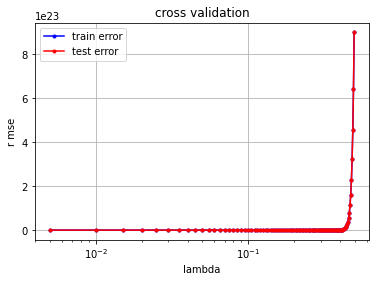

In [16]:
cross_validation_gradient_descent(y, tx, k_fold, initial_w=initial_w, max_iters = max_iters, gammas = gammas)

1
2
3
3,5
SGD iter. 0/29: loss=0.5, w0=-0.005, w1=-0.0032266509807341503
SGD iter. 1/29: loss=0.48738773548531755, w0=-0.009690154280385426, w1=-0.008902179417477455
SGD iter. 2/29: loss=0.4797962314816254, w0=-0.014360776128217387, w1=-0.013000795095695364
SGD iter. 3/29: loss=0.4742164257491586, w0=-0.008406433211810671, w1=-0.007389863628374582
SGD iter. 4/29: loss=0.4817498862136722, w0=-0.013054215245972552, w1=-0.013181343920798196
SGD iter. 5/29: loss=0.47396156651453936, w0=-0.017591251062536693, w1=-0.017162733709191746
SGD iter. 6/29: loss=0.4689548822852936, w0=-0.021709924904315808, w1=-0.020476962463584304
SGD iter. 7/29: loss=0.4703110483805417, w0=-0.020783915634442596, w1=-0.019978099081733567
SGD iter. 8/29: loss=0.47147540753472633, w0=-0.01916656137033746, w1=-0.018440392829621014
SGD iter. 9/29: loss=0.4649415155881739, w0=-0.023478493365413567, w1=-0.02285647766959703
SGD iter. 10/29: loss=0.46131090799647023, w0=-0.027500578951201067, w1=-0.027355423759972557
SGD 

SGD iter. 1/29: loss=0.5038527169428592, w0=-0.005054236537646834, w1=-0.003341857357981879
SGD iter. 2/29: loss=0.4916382261609393, w0=-0.009916590209455359, w1=-0.006500165488317101
SGD iter. 3/29: loss=0.481957044804486, w0=-0.004587755609610541, w1=-0.002277292876456047
SGD iter. 4/29: loss=0.49309009416737115, w0=-0.004476726990482019, w1=-0.005896869681629641
SGD iter. 5/29: loss=0.49400341192295827, w0=-0.004521955506288895, w1=-0.004794915152702899
SGD iter. 6/29: loss=0.4923001798101985, w0=-0.009395003198611066, w1=-0.00825196526187854
SGD iter. 7/29: loss=0.48242853039684075, w0=-0.01401978475937925, w1=-0.011052427669346209
SGD iter. 8/29: loss=0.4762256432241899, w0=-0.008347442254553958, w1=-0.004477650042917027
SGD iter. 9/29: loss=0.48530254946675816, w0=-0.007933448693892205, w1=-4.024940695301904e-05
SGD iter. 10/29: loss=0.4863165602783808, w0=-0.007654197903867968, w1=0.0012479239030256284
SGD iter. 11/29: loss=0.48705690861678, w0=-0.007363464929253908, w1=0.003164

SGD iter. 3/29: loss=0.46193008996364643, w0=-0.07279448340277048, w1=-0.13927093036071359
SGD iter. 4/29: loss=0.5682852143232103, w0=-0.03370806528750745, w1=-0.1173269795671015
SGD iter. 5/29: loss=0.4432602211336715, w0=-0.07154939445287167, w1=-0.14094332061612574
SGD iter. 6/29: loss=0.48282956492009216, w0=-0.03747046518022447, w1=-0.10771270508993296
SGD iter. 7/29: loss=0.4331125458569411, w0=-0.06915623841601902, w1=-0.14050966530858333
SGD iter. 8/29: loss=0.545013448801056, w0=-0.08898865941095117, w1=-0.15540237037398472
SGD iter. 9/29: loss=0.6954388214238832, w0=-0.03955564067611613, w1=-0.0803982538816301
SGD iter. 10/29: loss=0.43251113375641914, w0=-0.07476493290677172, w1=-0.10458354870460994
SGD iter. 11/29: loss=0.48067098155973526, w0=0.019626116750714878, w1=-0.012857353261085225
SGD iter. 12/29: loss=0.7638361583333072, w0=-0.05101310782655678, w1=-0.0760359363796182
SGD iter. 13/29: loss=0.4439996979275357, w0=-0.080432405110588, w1=-0.11374433218997368
SGD ite

SGD iter. 4/29: loss=0.7678453590049177, w0=-0.0343840509744663, w1=-0.03537160743283606
SGD iter. 5/29: loss=0.43310922057947715, w0=-0.11626086006179182, w1=-0.16134319241849765
SGD iter. 6/29: loss=2.235022975121044, w0=0.07834071461376191, w1=0.1356471659097956
SGD iter. 7/29: loss=1.6879334448385812, w0=-0.14658460953633856, w1=-0.15022160542775892
SGD iter. 8/29: loss=1.6144651287450653, w0=-0.08801383931747746, w1=-0.14164857413549747
SGD iter. 9/29: loss=0.5462007071374485, w0=0.0018755764366101546, w1=-0.04150476165883675
SGD iter. 10/29: loss=3.001102240604686, w0=-0.15459437547225877, w1=-0.16270458575810476
SGD iter. 11/29: loss=1.0617685102111565, w0=-0.18738816798571156, w1=-0.1995391150038737
SGD iter. 12/29: loss=0.839843774152138, w0=-0.12384231903437909, w1=-0.14393879376501728
SGD iter. 13/29: loss=1.253014646803564, w0=-0.0806414706832627, w1=-0.021270804383243788
SGD iter. 14/29: loss=1.12831697413908, w0=-0.36282095627314187, w1=-0.2683456777961553
SGD iter. 15/29

SGD iter. 9/29: loss=12.16613370268561, w0=0.27214822294438246, w1=1.1314541432926277
SGD iter. 10/29: loss=38.67414990170075, w0=-0.9819485799280782, w1=-0.14478989556750999
SGD iter. 11/29: loss=78.06825917004052, w0=0.47311776917740056, w1=1.9399753832749143
SGD iter. 12/29: loss=117.28431845519886, w0=-2.096407607396317, w1=-4.973370720960279
SGD iter. 13/29: loss=579.9193515276628, w0=4.042616790759949, w1=15.470849956390904
SGD iter. 14/29: loss=4135.173866778096, w0=-6.21665408083839, w1=4.654929807292149
SGD iter. 15/29: loss=723.5824922653574, w0=-1.5323624942118208, w1=7.746613863722571
SGD iter. 16/29: loss=152.66280512689232, w0=-1.1455297901622756, w1=7.65057600947578
SGD iter. 17/29: loss=200.23926438379354, w0=-3.325495608439704, w1=5.988331823730668
SGD iter. 18/29: loss=61.992103953819786, w0=-3.20572352486688, w1=6.179405321405953
SGD iter. 19/29: loss=59.10256610432938, w0=-3.3047846453930423, w1=6.12393621636159
SGD iter. 20/29: loss=54.930912874294044, w0=-3.142861

SGD iter. 14/29: loss=26.765924785549434, w0=0.09753230614932562, w1=-0.3797669917152183
SGD iter. 15/29: loss=51.950391566480796, w0=-0.12297638697253815, w1=-0.34738316708380934
SGD iter. 16/29: loss=39.33252153907322, w0=-0.800140197446243, w1=-0.9339218813559581
SGD iter. 17/29: loss=60.89271075381015, w0=0.07512519841828691, w1=-0.47033448691058344
SGD iter. 18/29: loss=14.149361855484768, w0=-0.0007873567787036045, w1=-0.5187936934752855
SGD iter. 19/29: loss=16.19504639933141, w0=1.0759897025063159, w1=0.6356454896790003
SGD iter. 20/29: loss=130.2763257008931, w0=-1.1260388806278938, w1=-1.7852418333075568
SGD iter. 21/29: loss=195.1284651602517, w0=2.995971403933832, w1=6.384543303260148
SGD iter. 22/29: loss=4805.980145801085, w0=-2.885402448409878, w1=1.7013277359214296
SGD iter. 23/29: loss=1520.5753410315021, w0=-10.252313428978393, w1=-9.006557364110268
SGD iter. 24/29: loss=22886.559702087186, w0=20.71978873149148, w1=20.77491993224961
SGD iter. 25/29: loss=63103.1022398

SGD iter. 20/29: loss=902.7872953434367, w0=-5.229299869696847, w1=-7.599669327927549
SGD iter. 21/29: loss=701.0613122082166, w0=1.4993985223232613, w1=-2.443607226944838
SGD iter. 22/29: loss=1733.5140539606016, w0=-6.528525730897297, w1=-9.104282694166505
SGD iter. 23/29: loss=2534.2858729266472, w0=3.615138530372139, w1=-0.20290237901293828
SGD iter. 24/29: loss=87.23604634095544, w0=2.462812683852085, w1=-1.1665477853297954
SGD iter. 25/29: loss=51.44819312011581, w0=4.233716559548514, w1=0.26305925556288945
SGD iter. 26/29: loss=152.63679175929207, w0=0.49296325658225726, w1=-2.6961795403631035
SGD iter. 27/29: loss=730.1719411157588, w0=5.940856093938447, w1=2.1858954004367694
SGD iter. 28/29: loss=636.0235371567348, w0=0.9177117119740812, w1=-3.204201815604634
SGD iter. 29/29: loss=566.916633082708, w0=6.491139762765038, w1=2.5911409926066407
4
4,5
1
2
3
3,5
SGD iter. 0/29: loss=0.5, w0=0.20500000000000002, w1=0.18484837057393716
SGD iter. 1/29: loss=3.192100123823885, w0=-0.43

SGD iter. 25/29: loss=56940343.27515855, w0=32.70270009438809, w1=-246.5240831402483
SGD iter. 26/29: loss=29341310.13196501, w0=269.9016438913178, w1=53.384734850291125
SGD iter. 27/29: loss=5226083.193437846, w0=-56.68744220646289, w1=-309.28580779102134
SGD iter. 28/29: loss=13894902.08647247, w0=739.6709900510548, w1=403.3924467992413
SGD iter. 29/29: loss=12934405.607509991, w0=-527.9596365306211, w1=-795.3265761369973
4
4,5
1
2
3
3,5
SGD iter. 0/29: loss=0.5, w0=0.255, w1=0.12459071524538053
SGD iter. 1/29: loss=3.1812070176921954, w0=-0.4376954414935572, w1=-0.4886542811420022
SGD iter. 2/29: loss=11.925685456675119, w0=0.8489657853807624, w1=3.570193499102666
SGD iter. 3/29: loss=165.89920419319327, w0=-4.89272336105272, w1=-1.966730600198535
SGD iter. 4/29: loss=6696.460477430954, w0=39.42240316599157, w1=51.26037523890737
SGD iter. 5/29: loss=893239.8103079164, w0=-387.7569406171279, w1=-457.9856909516727
SGD iter. 6/29: loss=62722848.327526614, w0=2787.296538294531, w1=2765.

SGD iter. 0/29: loss=0.5, w0=-0.30500000000000005, w1=-0.16473426800947297
SGD iter. 1/29: loss=2.951972008771113, w0=0.25790630013544447, w1=0.1698248963432886
SGD iter. 2/29: loss=1.8896279952186215, w0=-0.4169168194596804, w1=-0.890202930353874
SGD iter. 3/29: loss=38.63746218321687, w0=2.480856179558633, w1=8.063548212367156
SGD iter. 4/29: loss=834.1843467934284, w0=-10.121608147680838, w1=2.5429815937331126
SGD iter. 5/29: loss=30720.977211638485, w0=58.659022551061675, w1=41.8141560845127
SGD iter. 6/29: loss=337819.2946159098, w0=-170.4395926732934, w1=-11.224423375111073
SGD iter. 7/29: loss=5004704.901586405, w0=814.3647396383, w1=1094.6847406621391
SGD iter. 8/29: loss=141258757.98968586, w0=-3437.126001362152, w1=-2745.107558548145
SGD iter. 9/29: loss=808846712.6226039, w0=8740.623585493244, w1=8213.412479516217
SGD iter. 10/29: loss=15183565814.685268, w0=-95039.62847003971, w1=-96702.66371494166
SGD iter. 11/29: loss=4607793514448.216, w0=573229.3777321887, w1=140137.967

SGD iter. 7/29: loss=6601779.219884556, w0=-562.7233774426579, w1=-944.6772850060374
SGD iter. 8/29: loss=63265131.578589566, w0=2615.4307392188193, w1=2816.1371200099475
SGD iter. 9/29: loss=512919351.69867885, w0=-8543.339693765094, w1=-9706.574468472118
SGD iter. 10/29: loss=11245616584.12178, w0=18741.246140741394, w1=15957.164400100584
SGD iter. 11/29: loss=6344301932.377602, w0=-26838.057927707494, w1=-29677.103788736356
SGD iter. 12/29: loss=37587258901.7409, w0=69477.73391260218, w1=77366.4748621971
SGD iter. 13/29: loss=865353705014.919, w0=-364525.56406806986, w1=-373958.93197954283
SGD iter. 14/29: loss=37804183618852.45, w0=5723593.610934829, w1=11021033.509975562
SGD iter. 15/29: loss=1.7637908151482316e+16, w0=-88575973.43780927, w1=-91583686.54271372
SGD iter. 16/29: loss=2.48595179093635e+18, w0=265628063.50122952, w1=219588937.99412096
SGD iter. 17/29: loss=1.0333701696471368e+18, w0=-282910707.0253198, w1=-261770863.38523883
SGD iter. 18/29: loss=9.550371227126544e+18

SGD iter. 11/29: loss=14473580136.666721, w0=30351.79799205519, w1=37629.59323027046
SGD iter. 12/29: loss=32257258423.8079, w0=-50235.397550854745, w1=-43653.95879209462
SGD iter. 13/29: loss=241069805792.54095, w0=178249.3106895344, w1=95714.20365242781
SGD iter. 14/29: loss=4785348662207.002, w0=-160543.1293572805, w1=-323913.61980981403
SGD iter. 15/29: loss=1455254097950.1685, w0=243501.90554447199, w1=365737.97654410533
SGD iter. 16/29: loss=8850428998724.713, w0=-561599.4132680977, w1=-702085.2079556665
SGD iter. 17/29: loss=8614152638789.065, w0=653710.7144423383, w1=1047311.1656857239
SGD iter. 18/29: loss=32103582108844.523, w0=-1620498.611714101, w1=-1563180.9016508968
SGD iter. 19/29: loss=45171013446004.23, w0=1669315.0797289978, w1=1030414.1738961302
SGD iter. 20/29: loss=288175549782719.25, w0=-5507515.033027049, w1=-7369875.925330624
SGD iter. 21/29: loss=3229775871592172.0, w0=14632201.6415721, w1=9935375.565712996
SGD iter. 22/29: loss=1.0041849522011072e+16, w0=-2213

SGD iter. 17/29: loss=2.224153191697515e+22, w0=63077228465.71524, w1=40712856031.186386
SGD iter. 18/29: loss=8.996676541042755e+23, w0=-388926312104.5834, w1=-383644222148.85266
SGD iter. 19/29: loss=1.5511339953549647e+25, w0=1149160276304.1963, w1=277572524458.8789
SGD iter. 20/29: loss=5.05238875724555e+25, w0=-1898656998529.3203, w1=-3051641174713.0845
SGD iter. 21/29: loss=1.6968501818077027e+26, w0=4236547350615.3467, w1=2684953920890.601
SGD iter. 22/29: loss=3.968335705601639e+26, w0=-6170052972355.077, w1=-6124005005820.816
SGD iter. 23/29: loss=5.200343525691004e+27, w0=16252925398750.48, w1=9618983346034.889
SGD iter. 24/29: loss=8.04054318667859e+27, w0=-30880366988414.3, w1=-53213440904535.76
SGD iter. 25/29: loss=1.7685999044871652e+29, w0=194051805778438.25, w1=218096329608389.9
SGD iter. 26/29: loss=5.581295317090309e+30, w0=-559040664916322.5, w1=-573521517272972.2
SGD iter. 27/29: loss=6.619893473298313e+30, w0=930590603487145.5, w1=892972119834990.8
SGD iter. 28/29

SGD iter. 22/29: loss=1.5527103412546854e+23, w0=-62068224911.35133, w1=-46796416808.93925
SGD iter. 23/29: loss=4.942478067956104e+22, w0=11211697255.014526, w1=37610173370.47239
SGD iter. 24/29: loss=1.6868808565219918e+23, w0=-782220051041.156, w1=-923566930608.1552
SGD iter. 25/29: loss=1.464878422803965e+27, w0=24671368573873.465, w1=27474326947804.07
SGD iter. 26/29: loss=1.6399446617787743e+29, w0=-154563278334653.9, w1=-126825684562716.06
SGD iter. 27/29: loss=1.2612373723707114e+30, w0=677583959644744.6, w1=783702068726666.5
SGD iter. 28/29: loss=1.0400138621305942e+32, w0=-3956847172083718.5, w1=-2888284483384271.0
SGD iter. 29/29: loss=1.977370623162997e+33, w0=1.4800154959662414e+16, w1=2.2139835185795236e+16
4
4,5
1
2
3
3,5
SGD iter. 0/29: loss=0.5, w0=0.0, w1=-0.07152966930233444
SGD iter. 1/29: loss=1.738183173321183, w0=-0.16991202836700775, w1=-0.1970267943406654
SGD iter. 2/29: loss=5.9196748648257485, w0=1.8790239157533215, w1=2.0968258023134863
SGD iter. 3/29: loss=

SGD iter. 28/29: loss=2.208206453765074e+32, w0=-5794745863734718.0, w1=-7299074189292730.0
SGD iter. 29/29: loss=1.9109607167090057e+33, w0=4.867164710257492e+16, w1=1.109045081848479e+17
4
4,5
1
2
3
3,5
SGD iter. 0/29: loss=0.5, w0=-0.505, w1=-0.41806566564191067
SGD iter. 1/29: loss=10.865600617892262, w0=1.4592787270603247, w1=2.0382523266204164
SGD iter. 2/29: loss=78.97603731769952, w0=-4.138097892955935, w1=-1.9021163410869613
SGD iter. 3/29: loss=2355.509733396105, w0=37.58811837223623, w1=38.678856328414305
SGD iter. 4/29: loss=366788.098548436, w0=-727.9680320843484, w1=-707.308738999805
SGD iter. 5/29: loss=564243306.086983, w0=11349.020015919017, w1=9406.957596678363
SGD iter. 6/29: loss=11768556190.879663, w0=-28972.91812845691, w1=-28650.836685245744
SGD iter. 7/29: loss=28053732505.14175, w0=93640.46503642746, w1=118597.79149998986
SGD iter. 8/29: loss=638648149742.0813, w0=-395196.6899040409, w1=-471457.8921902056
SGD iter. 9/29: loss=19077908445122.69, w0=2565637.36577

SGD iter. 0/29: loss=0.5, w0=-0.555, w1=-0.5447388776867568
SGD iter. 1/29: loss=4.712242949429221, w0=1.2643876906729208, w1=1.0299067828208772
SGD iter. 2/29: loss=115.04012194899651, w0=-6.5018773323902765, w1=-8.878565351336416
SGD iter. 3/29: loss=2456.9597987050975, w0=25.183372352678607, w1=16.315876128752528
SGD iter. 4/29: loss=18758.175388725787, w0=-69.26739364256078, w1=-29.982679629975202
SGD iter. 5/29: loss=263647.2010405099, w0=300.5053755865542, w1=320.7630013376876
SGD iter. 6/29: loss=13250591.266599344, w0=-819.9151799810509, w1=174.05464757707236
SGD iter. 7/29: loss=7961242.57958584, w0=771.0708774508191, w1=1745.8165887183284
SGD iter. 8/29: loss=277726884.4279692, w0=-5678.034062385054, w1=-3226.636875535296
SGD iter. 9/29: loss=1953578868.7187226, w0=20020.158033620144, w1=629.569128902162
SGD iter. 10/29: loss=18387166985.082485, w0=-109198.76114467693, w1=-135995.92958858504
SGD iter. 11/29: loss=3136036607972.252, w0=573631.1635810141, w1=507973.223053675
SG

SGD iter. 3/29: loss=892376.5265871701, w0=-231.1000640241324, w1=-277.4431850083417
SGD iter. 4/29: loss=927832.2561421898, w0=230.20401873866393, w1=77.88079352124959
SGD iter. 5/29: loss=6999888.932339399, w0=-567.2271957749524, w1=-626.2455671251828
SGD iter. 6/29: loss=3985061.1316548106, w0=633.5489278895975, w1=0.12098119653262529
SGD iter. 7/29: loss=92969368.82345633, w0=-4348.381311178092, w1=-5190.567053915597
SGD iter. 8/29: loss=1390079727.2171853, w0=33833.730145201036, w1=24170.586212778795
SGD iter. 9/29: loss=426858361527.2039, w0=-292130.01621037174, w1=-1011344.6523031165
SGD iter. 10/29: loss=9950934621696.166, w0=1842158.7581584891, w1=837685.5880474205
SGD iter. 11/29: loss=278346849696757.25, w0=-10612594.053000249, w1=-7643381.387124781
SGD iter. 12/29: loss=2.3506035421973508e+16, w0=81640425.39930856, w1=61785087.80350855
SGD iter. 13/29: loss=7.846679471580292e+17, w0=-851239005.6938616, w1=-780778237.8765477
SGD iter. 14/29: loss=2.046760838814763e+20, w0=67

SGD iter. 7/29: loss=41733366033.22777, w0=76768.02274990949, w1=39131.687200252265
SGD iter. 8/29: loss=429493963068.74634, w0=-650678.114255945, w1=-946642.2231102774
SGD iter. 9/29: loss=151075685191419.97, w0=4789653.527356777, w1=5745732.284526806
SGD iter. 10/29: loss=878301177029114.5, w0=-21307123.251926214, w1=-18306233.81465441
SGD iter. 11/29: loss=8.943631430958592e+16, w0=182265658.8242559, w1=132491309.47932142
SGD iter. 12/29: loss=4.5557564385303434e+18, w0=-1590275459.1133554, w1=-1422968552.8165936
SGD iter. 13/29: loss=5.219113072176791e+20, w0=8304603349.370247, w1=5760964914.162857
SGD iter. 14/29: loss=1.587553923560114e+21, w0=-21733928737.54892, w1=-22347519095.968666
SGD iter. 15/29: loss=7.743018357518912e+22, w0=137363047782.01712, w1=136195203390.71411
SGD iter. 16/29: loss=9.745704591980154e+23, w0=-1263603342317.4429, w1=-3870617788993.244
SGD iter. 17/29: loss=9.753391919642948e+26, w0=20084454584647.547, w1=17873150997362.64
SGD iter. 18/29: loss=3.73335

SGD iter. 8/29: loss=273619656987.78635, w0=484826.32120521757, w1=438544.6343798863
SGD iter. 9/29: loss=69861242755341.336, w0=-3067593.503944741, w1=-6303590.413844101
SGD iter. 10/29: loss=459333857148009.5, w0=13270303.179384815, w1=7575663.363561576
SGD iter. 11/29: loss=1.1761803524667182e+16, w0=-67549652.07370217, w1=-40453564.70243476
SGD iter. 12/29: loss=4.669621067826919e+17, w0=1493889453.604112, w1=1224304439.7264543
SGD iter. 13/29: loss=2.1737859541509344e+21, w0=-21011474471.39866, w1=-18118167522.99575
SGD iter. 14/29: loss=2.4046709289259975e+22, w0=138705848511.42218, w1=98217244588.42001
SGD iter. 15/29: loss=4.111616931083131e+24, w0=-1514214225091.6301, w1=-864079611065.342
SGD iter. 16/29: loss=5.081212977978398e+26, w0=10782612339314.053, w1=8609033253131.775
SGD iter. 17/29: loss=5.874534308626538e+27, w0=-53273294117410.07, w1=-56893669676213.125
SGD iter. 18/29: loss=3.699203543751386e+29, w0=283809360823762.6, w1=262720407309535.38
SGD iter. 19/29: loss=2.

SGD iter. 9/29: loss=1394266428502688.5, w0=-32379274.488517664, w1=-26212055.93497309
SGD iter. 10/29: loss=6.352411745608219e+17, w0=968089867.4792696, w1=1222329245.5152366
SGD iter. 11/29: loss=3.645561148463768e+20, w0=-7756984369.297433, w1=-4746656774.014442
SGD iter. 12/29: loss=2.1433308071090434e+21, w0=29627442997.247604, w1=17923916509.737915
SGD iter. 13/29: loss=6.9002821745886905e+22, w0=-150206111110.96436, w1=-172555852402.34348
SGD iter. 14/29: loss=8.835841501981037e+23, w0=1098425484841.8965, w1=3639311058992.5703
SGD iter. 15/29: loss=2.5353500005527958e+26, w0=-10614742678795.812, w1=-9201780757753.818
SGD iter. 16/29: loss=1.0332232550973508e+28, w0=64794870510420.28, w1=42122498233057.43
SGD iter. 17/29: loss=1.9969089360104873e+29, w0=-389661309263108.9, w1=-408983758714257.9
SGD iter. 18/29: loss=3.3899367760043723e+31, w0=2232394639505689.0, w1=1891951742149903.5
SGD iter. 19/29: loss=1.305792391244432e+32, w0=-9321896969707524.0, w1=-9760916129955422.0
SGD i

SGD iter. 10/29: loss=4.017264770483013e+18, w0=-1747681579.2708344, w1=-1766789842.5076659
SGD iter. 11/29: loss=5.013226451613976e+20, w0=10285212063.505322, w1=6900080158.707058
SGD iter. 12/29: loss=3.2653763132104864e+21, w0=-29273944792.17265, w1=-27814308157.92049
SGD iter. 13/29: loss=1.7997331219409445e+22, w0=97387314752.5142, w1=97433662396.70103
SGD iter. 14/29: loss=1.1392125684129604e+24, w0=-593640258534.7268, w1=-351399260403.3776
SGD iter. 15/29: loss=1.9157248524786332e+25, w0=5640337142601.714, w1=4901949901580.986
SGD iter. 16/29: loss=1.2901300876317689e+28, w0=-114449949626946.45, w1=-165679906701760.78
SGD iter. 17/29: loss=2.1146067053483792e+30, w0=868603270317425.0, w1=1911390751613905.0
SGD iter. 18/29: loss=3.096416141516842e+31, w0=-3882711785283253.0, w1=-2448186866143663.0
SGD iter. 19/29: loss=1.0901494869406303e+33, w0=1.928348896929605e+16, w1=1.804808208133542e+16
SGD iter. 20/29: loss=2.5153508758970453e+34, w0=-8.195448263547554e+16, w1=-3.230270056

SGD iter. 11/29: loss=6.68131668873944e+20, w0=19005721808.85744, w1=9059223937.088326
SGD iter. 12/29: loss=2.6721461913001627e+22, w0=-138241955950.1592, w1=-116952128381.8093
SGD iter. 13/29: loss=1.9873250586800032e+24, w0=744600810246.3042, w1=584607394172.8461
SGD iter. 14/29: loss=2.1820065985794926e+25, w0=-6509496354561.67, w1=-10275268442136.67
SGD iter. 15/29: loss=4.006482868846127e+28, w0=164007671731952.75, w1=110921838402834.86
SGD iter. 16/29: loss=2.2905808736149406e+30, w0=-842806320938163.1, w1=-1127744263942391.5
SGD iter. 17/29: loss=2.8313805692790843e+31, w0=3951006503259906.0, w1=864796574361954.0
SGD iter. 18/29: loss=1.4202433121187596e+33, w0=-2.948756245532175e+16, w1=-5.48060349744013e+16
SGD iter. 19/29: loss=9.23140934588694e+34, w0=2.30262284791877e+17, w1=1.8414877767223488e+17
SGD iter. 20/29: loss=4.974026110495739e+36, w0=-1.4044870236113377e+18, w1=-9.072785696048869e+17
SGD iter. 21/29: loss=1.45505715885019e+38, w0=1.6156361668745556e+19, w1=7.496

(0.005, 0.9619995757471793)

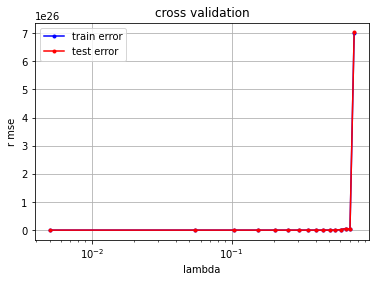

In [13]:
cross_validation_stochastic_gradient_descent(y, tx, k_fold, initial_w=initial_w, max_iters = max_iters, gammas = gammas, batch_size = 2)

1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
For polynomial expansion up to degree, the choice of gamma which leads to the best rmse is 0.00000 with a test rmse of 0.840


(1e-10, 0.8397247106385971)

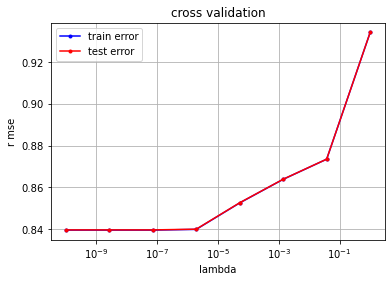

In [15]:
cross_validation_ridge_regression(y, tx, k_fold, lambdas)

1
2
3
3,5
Logistic regression iter. 0/29: loss=-67283.15924143717, w0=-0.00814664, w1=-0.00782662272075417
Logistic regression iter. 1/29: loss=-63268.949439100725, w0=-0.0160648205953978, w1=-0.015409278281759323
Logistic regression iter. 2/29: loss=-59605.04894150916, w0=-0.02376471876206907, w1=-0.022759154096585174
Logistic regression iter. 3/29: loss=-56255.532746674915, w0=-0.03125718690228187, w1=-0.02988838308018945
Logistic regression iter. 4/29: loss=-53187.08612112823, w0=-0.03855329114133935, w1=-0.03680944698543962
Logistic regression iter. 5/29: loss=-50369.54511139353, w0=-0.045663972437364475, w1=-0.043534733045084456
Logistic regression iter. 6/29: loss=-47776.00992164823, w0=-0.05259982124255059, w1=-0.050076237978458775
Logistic regression iter. 7/29: loss=-45382.7089242441, w0=-0.05937094158652156, w1=-0.0564453897664786
Logistic regression iter. 8/29: loss=-43168.73901412943, w0=-0.06598687945073028, w1=-0.06265295424948203
Logistic regression iter. 9/29: loss=-411

Logistic regression iter. 20/29: loss=-25677.13281366231, w0=-0.1360010486230958, w1=-0.12757188727245253
Logistic regression iter. 21/29: loss=-24713.479854817124, w0=-0.1412290595353824, w1=-0.13237538687691155
Logistic regression iter. 22/29: loss=-23799.91472965773, w0=-0.14638433641792362, w1=-0.13710768348550087
Logistic regression iter. 23/29: loss=-22932.850487192, w0=-0.15147025103886277, w1=-0.14177233002772172
Logistic regression iter. 24/29: loss=-22109.032969006286, w0=-0.1564899666417938, w1=-0.14637264587151066
Logistic regression iter. 25/29: loss=-21325.5032494485, w0=-0.16144645413128178, w1=-0.15091173587576096
Logistic regression iter. 26/29: loss=-20579.56499482662, w0=-0.1663425068124147, w1=-0.15539250766142118
Logistic regression iter. 27/29: loss=-19868.75602076669, w0=-0.17118075381732228, w1=-0.15981768727405277
Logistic regression iter. 28/29: loss=-19190.823441341745, w0=-0.17596367234208007, w1=-0.16418983339678833
Logistic regression iter. 29/29: loss=-18

Logistic regression iter. 7/29: loss=-22443.53318586731, w0=-0.15384183353218867, w1=-0.144240975920188
Logistic regression iter. 8/29: loss=-20132.363948528167, w0=-0.16878368840710728, w1=-0.15792809938588603
Logistic regression iter. 9/29: loss=-18135.55572870397, w0=-0.1831897626458481, w1=-0.17109923668318944
Logistic regression iter. 10/29: loss=-16396.608766432128, w0=-0.19712686523972822, w1=-0.18382320538476946
Logistic regression iter. 11/29: loss=-14871.786789241405, w0=-0.21065098465043136, w1=-0.1961570477530323
Logistic regression iter. 12/29: loss=-13526.68784332194, w0=-0.22380947761124279, w1=-0.20814851520548852
Logistic regression iter. 13/29: loss=-12333.867096409256, w0=-0.23664273475015848, w1=-0.21983793869611723
Logistic regression iter. 14/29: loss=-11271.153338921808, w0=-0.24918546410282336, w1=-0.231259655409865
Logistic regression iter. 15/29: loss=-10320.43365441867, w0=-0.26146769220057253, w1=-0.24244311082660833
Logistic regression iter. 16/29: loss=-94

Logistic regression iter. 28/29: loss=-3686.6639392455804, w0=-0.4060228414814928, w1=-0.3743638522810139
Logistic regression iter. 29/29: loss=-3426.063178823803, w0=-0.4164026686499925, w1=-0.3838702201088253
4
4,5
1
2
3
3,5
Logistic regression iter. 0/29: loss=-52019.40705437804, w0=-0.0407332, w1=-0.03913311360377084
Logistic regression iter. 1/29: loss=-39745.64136432439, w0=-0.0759130173572517, w1=-0.07236661535315811
Logistic regression iter. 2/29: loss=-31485.12595253955, w0=-0.10708627171301015, w1=-0.10143701645426138
Logistic regression iter. 3/29: loss=-25568.935435655243, w0=-0.13535081862221854, w1=-0.12755970533032104
Logistic regression iter. 4/29: loss=-21139.153516292823, w0=-0.16143197379430704, w1=-0.15151895013881778
Logistic regression iter. 5/29: loss=-17713.071005969585, w0=-0.1858244863038502, w1=-0.1738376969646669
Logistic regression iter. 6/29: loss=-14997.701594755796, w0=-0.20887952058207454, w1=-0.19487954592188772
Logistic regression iter. 7/29: loss=-12

Logistic regression iter. 19/29: loss=-2633.9137578442705, w0=-0.4533706047461089, w1=-0.41808364850528745
Logistic regression iter. 20/29: loss=-2340.4348387163877, w0=-0.4702210675982635, w1=-0.4335518625019002
Logistic regression iter. 21/29: loss=-2082.055454044506, w0=-0.48694639649810567, w1=-0.44891683597913706
Logistic regression iter. 22/29: loss=-1854.150332152392, w0=-0.5035615186645912, w1=-0.4641914651792465
Logistic regression iter. 23/29: loss=-1652.7857813723397, w0=-0.5200794199598057, w1=-0.47938688902477006
Logistic regression iter. 24/29: loss=-1474.600022657189, w0=-0.5365114278988554, w1=-0.49451275680901113
Logistic regression iter. 25/29: loss=-1316.7074919135957, w0=-0.5528674473520635, w1=-0.5095774494302385
Logistic regression iter. 26/29: loss=-1176.6216455199628, w0=-0.5691561580673238, w1=-0.5245882633999606
Logistic regression iter. 27/29: loss=-1052.1921911742938, w0=-0.585385181130859, w1=-0.5395515647772148
Logistic regression iter. 28/29: loss=-941.55

Logistic regression iter. 10/29: loss=-4511.110870932312, w0=-0.3766005048232228, w1=-0.3481271740697073
Logistic regression iter. 11/29: loss=-3788.3264494291116, w0=-0.4013063452862308, w1=-0.3707213024819384
Logistic regression iter. 12/29: loss=-3192.5410509330977, w0=-0.4255832271535748, w1=-0.39295091036831464
Logistic regression iter. 13/29: loss=-2698.5310983265745, w0=-0.44950568207242564, w1=-0.4148824493732538
Logistic regression iter. 14/29: loss=-2286.871524296862, w0=-0.47313378419724844, w1=-0.4365688638179542
Logistic regression iter. 15/29: loss=-1942.3862547792578, w0=-0.4965163618974804, w1=-0.45805271812200077
Logistic regression iter. 16/29: loss=-1653.072695104922, w0=-0.5196933838545567, w1=-0.47936849315644886
Logistic regression iter. 17/29: loss=-1409.3381097490706, w0=-0.5426977628412758, w1=-0.5005443027025751
Logistic regression iter. 18/29: loss=-1203.4464551449223, w0=-0.5655567400156982, w1=-0.5216031964665339
Logistic regression iter. 19/29: loss=-1029.

Logistic regression iter. 1/29: loss=-26374.812823635522, w0=-0.12962358173872446, w1=-0.1229635156399213
Logistic regression iter. 2/29: loss=-18674.25428678834, w0=-0.1770731288017027, w1=-0.16658337755167973
Logistic regression iter. 3/29: loss=-13785.757249832091, w0=-0.21922253046059914, w1=-0.20507441561876627
Logistic regression iter. 4/29: loss=-10452.099716719069, w0=-0.2578796066567813, w1=-0.24028629832120935
Logistic regression iter. 5/29: loss=-8071.862352519257, w0=-0.29409812631701293, w1=-0.273264278580847
Logistic regression iter. 6/29: loss=-6317.639635364862, w0=-0.3285475565413156, w1=-0.3046552684788699
Logistic regression iter. 7/29: loss=-4994.8020018446305, w0=-0.3616787512352437, w1=-0.3348851843204744
Logistic regression iter. 8/29: loss=-3980.0062657087333, w0=-0.39380825745449655, w1=-0.36424714488061805
Logistic regression iter. 9/29: loss=-3191.2002168754193, w0=-0.42516529843462736, w1=-0.39294962848081433
Logistic regression iter. 10/29: loss=-2571.69595

Logistic regression iter. 23/29: loss=-197.65509243925342, w0=-0.833879626263154, w1=-0.7699510240385651
Logistic regression iter. 24/29: loss=-164.2297889059077, w0=-0.8623450438056586, w1=-0.7963089905189079
Logistic regression iter. 25/29: loss=-136.67732469561687, w0=-0.8907852961963287, w1=-0.8226485465753629
Logistic regression iter. 26/29: loss=-113.9417374637658, w0=-0.919204840937544, w1=-0.8489730636049755
Logistic regression iter. 27/29: loss=-95.16267638644757, w0=-0.9476073259931833, w1=-0.8752852795516126
Logistic regression iter. 28/29: loss=-79.63783151247478, w0=-0.9759957410676491, w1=-0.90158742147151
Logistic regression iter. 29/29: loss=-66.79291093095632, w0=-1.0043725396500507, w1=-0.9278813035572122
4
4,5
1
2
3
3,5
Logistic regression iter. 0/29: loss=-40131.58077465162, w0=-0.07331975999999998, w1=-0.07043960448678752
Logistic regression iter. 1/29: loss=-26374.812823635522, w0=-0.12962358173872446, w1=-0.1229635156399213
Logistic regression iter. 2/29: loss=-1

Logistic regression iter. 14/29: loss=-567.8158365597302, w0=-0.6748775620245117, w1=-0.6232590579229174
Logistic regression iter. 15/29: loss=-448.1987187961255, w0=-0.7100113515547354, w1=-0.6557324926916797
Logistic regression iter. 16/29: loss=-354.62053698043906, w0=-0.7450340136601498, w1=-0.6881210832032583
Logistic regression iter. 17/29: loss=-281.2204465875647, w0=-0.7799699350843274, w1=-0.7204441148212466
Logistic regression iter. 18/29: loss=-223.51458160622158, w0=-0.8148379764581363, w1=-0.752716342087779
Logistic regression iter. 19/29: loss=-178.0544479208593, w0=-0.8496527745583369, w1=-0.7849490963957314
Logistic regression iter. 20/29: loss=-142.17601176007594, w0=-0.8844257223318048, w1=-0.8171511093941208
Logistic regression iter. 21/29: loss=-113.81338791501409, w0=-0.9191657114115374, w1=-0.8493291294999857
Logistic regression iter. 22/29: loss=-91.35923215161333, w0=-0.9538796978815779, w1=-0.8814883863218219
Logistic regression iter. 23/29: loss=-73.5593287988

Logistic regression iter. 3/29: loss=-8059.565916617365, w0=-0.29286282125932467, w1=-0.27306063653585005
Logistic regression iter. 4/29: loss=-5665.33465265241, w0=-0.3425898246292231, w1=-0.31837188666688876
Logistic regression iter. 5/29: loss=-4062.029470923858, w0=-0.38972075234056025, w1=-0.36140525212256
Logistic regression iter. 6/29: loss=-2953.236697749741, w0=-0.4350961031713225, w1=-0.4029329482859001
Logistic regression iter. 7/29: loss=-2169.1765365254055, w0=-0.47925059284881516, w1=-0.4434342906158852
Logistic regression iter. 8/29: loss=-1605.7964513996876, w0=-0.522539376101057, w1=-0.4832207901175474
Logistic regression iter. 9/29: loss=-1196.1388050555406, w0=-0.5652055576580277, w1=-0.5225015449307259
Logistic regression iter. 10/29: loss=-895.5374194614936, w0=-0.6074192020035039, w1=-0.5614202381107761
Logistic regression iter. 11/29: loss=-673.3809039110167, w0=-0.6493012115717335, w1=-0.6000773429281409
Logistic regression iter. 12/29: loss=-508.2550391104173, 

Logistic regression iter. 23/29: loss=-29.41301859544731, w0=-1.143072758883824, w1=-1.057251857292533
Logistic regression iter. 24/29: loss=-23.5194664725624, w0=-1.1840072749661026, w1=-1.0951941239303349
Logistic regression iter. 25/29: loss=-19.015610581029737, w0=-1.2249354310814657, w1=-1.1331320750257559
Logistic regression iter. 26/29: loss=-15.574499553530284, w0=-1.2658587122769074, w1=-1.171066748071643
Logistic regression iter. 27/29: loss=-12.947440294637799, w0=-1.3067782509810233, w1=-1.2089989269669488
Logistic regression iter. 28/29: loss=-10.944916252687559, w0=-1.3476949122250375, w1=-1.246929205108439
Logistic regression iter. 29/29: loss=-9.422253216511548, w0=-1.3886093578774088, w1=-1.2848580324857084
4
4,5
1
2
3
3,5
Logistic regression iter. 0/29: loss=-30983.632465623676, w0=-0.10590631999999997, w1=-0.10174609536980418
Logistic regression iter. 1/29: loss=-18208.98833857784, w0=-0.17877438901524778, w1=-0.1690435027501958
Logistic regression iter. 2/29: loss=-

Logistic regression iter. 15/29: loss=-113.16275261940044, w0=-0.9195544828527128, w1=-0.8506109819780977
Logistic regression iter. 16/29: loss=-83.95300858139875, w0=-0.9668907875562083, w1=-0.8944638253251155
Logistic regression iter. 17/29: loss=-62.654549448473055, w0=-1.0141906921038968, w1=-0.9382906736216733
Logistic regression iter. 18/29: loss=-47.093370064484695, w0=-1.06146410498355, w1=-0.9820988175372625
Logistic regression iter. 19/29: loss=-35.70547685458058, w0=-1.1087181858586084, w1=-1.025893463339914
Logistic regression iter. 20/29: loss=-27.361625935759896, w0=-1.155958124039683, w1=-1.0696783414709814
Logistic regression iter. 21/29: loss=-21.24381551050683, w0=-1.2031876914047936, w1=-1.1134561332583752
Logistic regression iter. 22/29: loss=-16.75774614075528, w0=-1.250409636822647, w1=-1.1572287715504401
Logistic regression iter. 23/29: loss=-13.470467804277623, w0=-1.2976259685989169, w1=-1.2009976534275677
Logistic regression iter. 24/29: loss=-11.0657762518966

Logistic regression iter. 5/29: loss=-2143.023640486093, w0=-0.4797613295523677, w1=-0.4449639692075111
Logistic regression iter. 6/29: loss=-1448.5275087154707, w0=-0.536325975333989, w1=-0.496956022979811
Logistic regression iter. 7/29: loss=-989.0452235036571, w0=-0.5918892923944584, w1=-0.548137207492144
Logistic regression iter. 8/29: loss=-680.6829176371152, w0=-0.646790602622026, w1=-0.598792602084176
Logistic regression iter. 9/29: loss=-471.55170531666124, w0=-0.7012485411539962, w1=-0.649102090621675
Logistic regression iter. 10/29: loss=-328.5719507448201, w0=-0.7554066337921543, w1=-0.6991815156083467
Logistic regression iter. 11/29: loss=-230.19263127394797, w0=-0.8093603900953747, w1=-0.7491066033072978
Logistic regression iter. 12/29: loss=-162.14781595517744, w0=-0.8631740258674302, w1=-0.7989274250253211
Logistic regression iter. 13/29: loss=-114.8795948984989, w0=-0.9168910685439392, w1=-0.8486773894438554
Logistic regression iter. 14/29: loss=-81.92410616575253, w0=-

Logistic regression iter. 24/29: loss=-6.83052745616734, w0=-1.505842227750839, w1=-1.3945526910415085
Logistic regression iter. 25/29: loss=-6.206174976001072, w0=-1.5593395285963711, w1=-1.4441479383489606
Logistic regression iter. 26/29: loss=-5.796931457006138, w0=-1.6128357879818385, w1=-1.4937425323939002
Logistic regression iter. 27/29: loss=-5.541803724124996, w0=-1.666331299460272, w1=-1.543336662464716
Logistic regression iter. 28/29: loss=-5.397313884490942, w0=-1.7198262727794902, w1=-1.592930462337104
Logistic regression iter. 29/29: loss=-5.3324030764806345, w0=-1.773320858124471, w1=-1.6425240267604702
4
4,5
1
2
3
3,5
Logistic regression iter. 0/29: loss=-23969.640375646522, w0=-0.13849287999999998, w1=-0.13305258625282088
Logistic regression iter. 1/29: loss=-12898.223385359397, w0=-0.22484122590463645, w1=-0.21223171024567838
Logistic regression iter. 2/29: loss=-7755.322746550251, w0=-0.296539939032285, w1=-0.27751696244002994
Logistic regression iter. 3/29: loss=-491

Logistic regression iter. 19/29: loss=-10.129469849332413, w0=-1.3681130258910041, w1=-1.2674507341575112
Logistic regression iter. 20/29: loss=-8.310435353624259, w0=-1.4279097079099405, w1=-1.3228842939962755
Logistic regression iter. 21/29: loss=-7.107167844409183, w0=-1.48770337062865, w1=-1.3783159059350818
Logistic regression iter. 22/29: loss=-6.325740208039358, w0=-1.5474949595952534, w1=-1.4337461966326694
Logistic regression iter. 23/29: loss=-5.8340886822808535, w0=-1.607285120408843, w1=-1.4891755886501774
Logistic regression iter. 24/29: loss=-5.542013772463874, w0=-1.6670742951435644, w1=-1.5446043677844532
Logistic regression iter. 25/29: loss=-5.387736718239727, w0=-1.726862787345912, w1=-1.6000327278867208
Logistic regression iter. 26/29: loss=-5.328831224981081, w0=-1.7866508059951298, w1=-1.655460800801757
Logistic regression iter. 27/29: loss=-5.336086486549594, w0=-1.846438495330334, w1=-1.7108886764349898
Logistic regression iter. 28/29: loss=-5.389341100603913, w

Logistic regression iter. 12/29: loss=-54.839081263938276, w0=-1.0353494961295016, w1=-0.9596345697012842
Logistic regression iter. 13/29: loss=-37.08524566596423, w0=-1.1015185270456345, w1=-1.0209563424944477
Logistic regression iter. 14/29: loss=-25.59406098174685, w0=-1.167656742704957, w1=-1.082256752727068
Logistic regression iter. 15/29: loss=-18.14684811224334, w0=-1.2337749927599655, w1=-1.1435435275559125
Logistic regression iter. 16/29: loss=-13.322935010084487, w0=-1.2998802507053626, w1=-1.2048215583881028
Logistic regression iter. 17/29: loss=-10.207925796471628, w0=-1.3659770200855132, w1=-1.2660939576504497
Logistic regression iter. 18/29: loss=-8.210524305220542, w0=-1.4320682221961645, w1=-1.3273627152489953
Logistic regression iter. 19/29: loss=-6.946720234129442, w0=-1.498155759816874, w1=-1.3886291090417775
Logistic regression iter. 20/29: loss=-6.166123696470087, w0=-1.564240877139261, w1=-1.4498939630166334
Logistic regression iter. 21/29: loss=-5.704857412757698

Logistic regression iter. 3/29: loss=-3070.951404262926, w0=-0.42659387516595926, w1=-0.3974783079104447
Logistic regression iter. 4/29: loss=-1868.7218339939604, w0=-0.4981050851134647, w1=-0.46305481741899535
Logistic regression iter. 5/29: loss=-1159.2130231294718, w0=-0.567483325820479, w1=-0.5268756750506524
Logistic regression iter. 6/29: loss=-728.8991213492773, w0=-0.6356013027580465, w1=-0.589685406472782
Logistic regression iter. 7/29: loss=-463.1432323807303, w0=-0.7029561515568065, w1=-0.6518966789173897
Logistic regression iter. 8/29: loss=-296.89948415381815, w0=-0.7698411544210917, w1=-0.7137470824904354
Logistic regression iter. 9/29: loss=-191.90641982090426, w0=-0.8364333615194005, w1=-0.7753769061889995
Logistic regression iter. 10/29: loss=-125.10135221768377, w0=-0.9028413913044904, w1=-0.836870475786507
Logistic regression iter. 11/29: loss=-82.34068749768491, w0=-0.9691326815145911, w1=-0.8982791575451468
Logistic regression iter. 12/29: loss=-54.839081263938276,

C:\Users\basti\ML\The_MadLads\logistic_regression.py:37: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(np.dot(y.T,np.log(y_pred)+ np.dot((1-y).T, np.log(1-y_pred)))) /(len(y_pred))


Logistic regression iter. 29/29: loss=nan, w0=-2.3522220690518, w1=-2.1810775770754662
4
4,5
1
2
3
3,5
Logistic regression iter. 0/29: loss=-16390.26866662165, w0=-0.18737271999999996, w1=-0.1800123225773459
Logistic regression iter. 1/29: loss=-7910.954556183523, w0=-0.29058158172547277, w1=-0.27409798988281575
Logistic regression iter. 2/29: loss=-4280.292199023439, w0=-0.3781600722407753, w1=-0.35389876642857065
Logistic regression iter. 3/29: loss=-2440.22696398765, w0=-0.4588099096275718, w1=-0.4276798999885534
Logistic regression iter. 4/29: loss=-1432.8781001915297, w0=-0.5359009750005781, w1=-0.4984816574925238
Logistic regression iter. 5/29: loss=-857.5282540993115, w0=-0.6110355590573103, w1=-0.5676943588688736
Logistic regression iter. 6/29: loss=-520.2840673800262, w0=-0.6850531071776198, w1=-0.6360232902305556
Logistic regression iter. 7/29: loss=-319.17101287802006, w0=-0.7584176916463043, w1=-0.7038476096443487
Logistic regression iter. 8/29: loss=-197.7580172554904, w0=

Logistic regression iter. 21/29: loss=-5.3420660513269995, w0=-1.7732301340785996, w1=-1.6443050597321214
Logistic regression iter. 22/29: loss=-5.3422427668141665, w0=-1.8456047828255637, w1=-1.711402008046597
Logistic regression iter. 23/29: loss=-5.4104884213646205, w0=-1.917979079783224, w1=-1.7784987478144034
Logistic regression iter. 24/29: loss=-5.522710524173932, w0=-1.9903531488541413, w1=-1.8455953544734567
Logistic regression iter. 25/29: loss=-5.663430011697354, w0=-2.0627270698577105, w1=-1.912691875920514
Logistic regression iter. 26/29: loss=-5.822670084221536, w0=-2.1351008943776346, w1=-1.9797883426623488
Logistic regression iter. 27/29: loss=nan, w0=-2.207474655851755, w1=-2.0468847741883094
Logistic regression iter. 28/29: loss=nan, w0=-2.279848376018861, w1=-2.113981182985206
Logistic regression iter. 29/29: loss=nan, w0=-2.3522220690518, w1=-2.1810775770754662
4
4,5
1
2
3
3,5
Logistic regression iter. 0/29: loss=-14460.04270120874, w0=-0.20366599999999996, w1=-0.19

Logistic regression iter. 12/29: loss=-20.60270173250581, w0=-1.2083463878231846, w1=-1.121334053941514
Logistic regression iter. 13/29: loss=-14.090112690031418, w0=-1.2870481870024248, w1=-1.1942874820580933
Logistic regression iter. 14/29: loss=-10.215033404487993, w0=-1.365736400282461, w1=-1.2672318587781113
Logistic regression iter. 15/29: loss=-7.930886757380614, w0=-1.444416393283281, w1=-1.3401708502619187
Logistic regression iter. 16/29: loss=-6.611367837220584, w0=-1.5230913871676544, w1=-1.4131066205715934
Logistic regression iter. 17/29: loss=-5.879568173755629, w0=-1.6017633262972173, w1=-1.486040454531344
Logistic regression iter. 18/29: loss=-5.507482956205243, w0=-1.6804333903437887, w1=-1.5589731190599885
Logistic regression iter. 19/29: loss=-5.356511827307345, w0=-1.7591022984821587, w1=-1.6319050742327432
Logistic regression iter. 20/29: loss=-5.3420151882618905, w0=-1.8377704911476422, w1=-1.7048365973459962
Logistic regression iter. 21/29: loss=-5.412081359069285

Logistic regression iter. 4/29: loss=-848.4896166649548, w0=-0.6112941135208176, w1=-0.5693797677142638
Logistic regression iter. 5/29: loss=-472.9905150307592, w0=-0.698159608974787, w1=-0.6495723306148136
Logistic regression iter. 6/29: loss=-267.61671839768525, w0=-0.7841739985074485, w1=-0.7291087541927705
Logistic regression iter. 7/29: loss=-153.49901528109947, w0=-0.8697249235825775, w1=-0.808296653350381
Logistic regression iter. 8/29: loss=-89.35931449913632, w0=-0.9550195470864566, w1=-0.8872961890200936
Logistic regression iter. 9/29: loss=-52.99996925605204, w0=-1.0401707402213933, w1=-0.9661925606500499
Logistic regression iter. 10/29: loss=-32.25983968180621, w0=-1.1252408796740994, w1=-1.045031814837953
Logistic regression iter. 11/29: loss=-20.384054030187432, w0=-1.210264827430446, w1=-1.1238391515055501
Logistic regression iter. 12/29: loss=-13.579607633590944, w0=-1.2952622527267512, w1=-1.2026285065934386
Logistic regression iter. 13/29: loss=-9.697237935068596, w0=

2
3
3,5
Logistic regression iter. 0/29: loss=-11278.810369566876, w0=-0.23625255999999997, w1=-0.2269720589018709
Logistic regression iter. 1/29: loss=-4943.700916102144, w0=-0.3544518624730982, w1=-0.33455587877906223
Logistic regression iter. 2/29: loss=-2415.718797728031, w0=-0.45768957269758576, w1=-0.4289003894341652
Logistic regression iter. 3/29: loss=-1239.956498452501, w0=-0.5548069749770339, w1=-0.5181001932678994
Logistic regression iter. 4/29: loss=-654.6547226601384, w0=-0.6490586710635345, w1=-0.6049819905592284
Logistic regression iter. 5/29: loss=-352.4159971873329, w0=-0.7418846288747851, w1=-0.6907469040945006
Logistic regression iter. 6/29: loss=-192.79416144517373, w0=-0.8339771107078972, w1=-0.7759531832401274
Logistic regression iter. 7/29: loss=-107.19592648205393, w0=-0.9256841080878234, w1=-0.860873272063531
Logistic regression iter. 8/29: loss=-60.784480793624915, w0=-1.0171853817417293, w1=-0.9456442031740153
Logistic regression iter. 9/29: loss=-35.418690711

Logistic regression iter. 21/29: loss=-5.995827961741803, w0=-2.203793920923164, w1=-2.0456459845187647
Logistic regression iter. 22/29: loss=nan, w0=-2.2950477444887523, w1=-2.1302458056775286
Logistic regression iter. 23/29: loss=nan, w0=-2.3863015260449725, w1=-2.214845604078862
Logistic regression iter. 24/29: loss=nan, w0=-2.4775552827649303, w1=-2.2994453892812587
Logistic regression iter. 25/29: loss=nan, w0=-2.56880902474586, w1=-2.3840451668007434
Logistic regression iter. 26/29: loss=nan, w0=-2.6600627579480904, w1=-2.468644939832613
Logistic regression iter. 27/29: loss=nan, w0=-2.7513164859033266, w1=-2.5532447102345457
Logistic regression iter. 28/29: loss=nan, w0=-2.8425702107118695, w1=-2.637844479090309
Logistic regression iter. 29/29: loss=nan, w0=-2.9338239336271577, w1=-2.722444247034277
4
4,5
1
2
3
3,5
Logistic regression iter. 0/29: loss=-11278.810369566876, w0=-0.23625255999999997, w1=-0.2269720589018709
Logistic regression iter. 1/29: loss=-4943.700916102144, w0=

Logistic regression iter. 20/29: loss=nan, w0=-2.250395536527923, w1=-2.0896166800851796
Logistic regression iter. 21/29: loss=nan, w0=-2.3479427014770957, w1=-2.1800509576620954
Logistic regression iter. 22/29: loss=nan, w0=-2.4454898303016273, w1=-2.2704852158672653
Logistic regression iter. 23/29: loss=nan, w0=-2.5430369384770444, w1=-2.3609194632249735
Logistic regression iter. 24/29: loss=nan, w0=-2.640584034799515, w1=-2.4513537044840943
Logistic regression iter. 25/29: loss=nan, w0=-2.738131124290673, w1=-2.5417879423013523
Logistic regression iter. 26/29: loss=nan, w0=-2.8356782098293856, w1=-2.6322221781689947
Logistic regression iter. 27/29: loss=nan, w0=-2.9332252930727587, w1=-2.7226564129284077
Logistic regression iter. 28/29: loss=nan, w0=-3.0307723749783455, w1=-2.8130906470557377
Logistic regression iter. 29/29: loss=nan, w0=-3.1283194561015337, w1=-2.903524880821386
4
4,5
1
2
3
3,5
Logistic regression iter. 0/29: loss=-9971.747075838624, w0=-0.2525458399999999, w1=-0.2

Logistic regression iter. 14/29: loss=-5.36714244877936, w0=-1.7655120593735958, w1=-1.6408703026087401
Logistic regression iter. 15/29: loss=-5.377895407761565, w0=-1.8693540157947126, w1=-1.7371398787755488
Logistic regression iter. 16/29: loss=-5.5120702684400165, w0=-1.9731952768463477, w1=-1.8334090429817875
Logistic regression iter. 17/29: loss=-5.712413642129917, w0=-2.077036163934603, w1=-1.9296779902847956
Logistic regression iter. 18/29: loss=-5.948443512672497, w0=-2.180876848707641, w1=-2.0259468227133324
Logistic regression iter. 19/29: loss=nan, w0=-2.2847174234078373, w1=-2.1222155939666214
Logistic regression iter. 20/29: loss=nan, w0=-2.3885579378988324, w1=-2.218484332471768
Logistic regression iter. 21/29: loss=nan, w0=-2.4923984192869026, w1=-2.314753053359815
Logistic regression iter. 22/29: loss=nan, w0=-2.5962388823859803, w1=-2.4110217647262804
Logistic regression iter. 23/29: loss=nan, w0=-2.7000793353333234, w1=-2.507290470923689
Logistic regression iter. 24/2

Logistic regression iter. 11/29: loss=-7.738632643298827, w0=-1.4539727341337787, w1=-1.352053246305924
Logistic regression iter. 12/29: loss=-6.246759829029776, w0=-1.5578230930743229, w1=-1.4483280606761693
Logistic regression iter. 13/29: loss=-5.588060787851263, w0=-1.6616688017731343, w1=-1.5445999390982859
Logistic regression iter. 14/29: loss=-5.36714244877936, w0=-1.7655120593735958, w1=-1.6408703026087401
Logistic regression iter. 15/29: loss=-5.377895407761565, w0=-1.8693540157947126, w1=-1.7371398787755488
Logistic regression iter. 16/29: loss=-5.5120702684400165, w0=-1.9731952768463477, w1=-1.8334090429817875
Logistic regression iter. 17/29: loss=-5.712413642129917, w0=-2.077036163934603, w1=-1.9296779902847956
Logistic regression iter. 18/29: loss=-5.948443512672497, w0=-2.180876848707641, w1=-2.0259468227133324
Logistic regression iter. 19/29: loss=nan, w0=-2.2847174234078373, w1=-2.1222155939666214
Logistic regression iter. 20/29: loss=nan, w0=-2.3885579378988324, w1=-2.

Logistic regression iter. 8/29: loss=-20.84464654374136, w0=-1.2053123177875587, w1=-1.1223343128131757
Logistic regression iter. 9/29: loss=-12.437118343335278, w0=-1.315495344743267, w1=-1.224469456856907
Logistic regression iter. 10/29: loss=-8.379911445645948, w0=-1.4256538468943736, w1=-1.3265882990670337
Logistic regression iter. 11/29: loss=-6.478991320310846, w0=-1.5358001531233518, w1=-1.4286992209741438
Logistic regression iter. 12/29: loss=-5.657048227085067, w0=-1.6459403371438133, w1=-1.5308062568099237
Logistic regression iter. 13/29: loss=-5.379730795644207, w0=-1.7560774210962244, w1=-1.632911368837176
Logistic regression iter. 14/29: loss=-5.379547258831523, w0=-1.8662129225658737, w1=-1.7350155206305262
Logistic regression iter. 15/29: loss=-5.521451523290729, w0=-1.9763476101130746, w1=-1.8371191894924173
Logistic regression iter. 16/29: loss=-5.736722973030699, w0=-2.086481876057531, w1=-1.9392226137561615
Logistic regression iter. 17/29: loss=-5.990131895443604, w0

Logistic regression iter. 7/29: loss=-27.634802603708795, w0=-1.1520679637398086, w1=-1.0737751188954217
Logistic regression iter. 8/29: loss=-15.29136653763268, w0=-1.2685678438200343, w1=-1.1817605327275338
Logistic regression iter. 9/29: loss=-9.543270837720776, w0=-1.3850299445852787, w1=-1.2897205597160084
Logistic regression iter. 10/29: loss=-6.923495154369112, w0=-1.5014740656839825, w1=-1.3976688007782205
Logistic regression iter. 11/29: loss=-5.803899230608021, w0=-1.6179095368628948, w1=-1.5056115076356924
Logistic regression iter. 12/29: loss=-5.410904184844787, w0=-1.734340805147679, w1=-1.6135515890647194
Logistic regression iter. 13/29: loss=-5.3730713570989765, w0=-1.850770012499117, w1=-1.7214904132926458
Logistic regression iter. 14/29: loss=-5.510325934309853, w0=-1.9671982005997353, w1=-1.8294286303111287
Logistic regression iter. 15/29: loss=-5.7345851292472565, w0=-2.083625880588306, w1=-1.9373665517195775
Logistic regression iter. 16/29: loss=-6.002403818644809, 

Logistic regression iter. 5/29: loss=-83.7077034839246, w0=-0.9634974367497455, w1=-0.8998283106865141
Logistic regression iter. 6/29: loss=-39.96487921922837, w0=-1.0864741279733543, w1=-1.0137758762833864
Logistic regression iter. 7/29: loss=-20.396847566588395, w0=-1.2093107448100107, w1=-1.12762534875524
Logistic regression iter. 8/29: loss=-11.619969272187646, w0=-1.3320845802803276, w1=-1.2414320513726262
Logistic regression iter. 9/29: loss=-7.731601790385553, w0=-1.4548298762704577, w1=-1.3552198198026686
Logistic regression iter. 10/29: loss=-6.08625384556581, w0=-1.5775620347491037, w1=-1.4689990940653432
Logistic regression iter. 11/29: loss=-5.48191468937227, w0=-1.7002880765035848, w1=-1.5827745123573462
Logistic regression iter. 12/29: loss=-5.365783285183631, w0=-1.8230112404984182, w1=-1.696548161396045
Logistic regression iter. 13/29: loss=-5.48082437216145, w0=-1.9457330374582096, w1=-1.8103209906830282
Logistic regression iter. 14/29: loss=-5.706313906104006, w0=-2.0

3
3,5
Logistic regression iter. 0/29: loss=-6134.92305772418, w0=-0.31771895999999994, w1=-0.30523828610941256
Logistic regression iter. 1/29: loss=-2303.50697033845, w0=-0.46020511738727377, w1=-0.4352459530304094
Logistic regression iter. 2/29: loss=-950.6265843743598, w0=-0.5903878089224046, w1=-0.5548514229571334
Logistic regression iter. 3/29: loss=-410.3283862150943, w0=-0.716172741994819, w1=-0.6709275204067079
Logistic regression iter. 4/29: loss=-182.59200143406537, w0=-0.8402030063376462, w1=-0.7856516559158658
Logistic regression iter. 5/29: loss=-83.7077034839246, w0=-0.9634974367497455, w1=-0.8998283106865141
Logistic regression iter. 6/29: loss=-39.96487921922837, w0=-1.0864741279733543, w1=-1.0137758762833864
Logistic regression iter. 7/29: loss=-20.396847566588395, w0=-1.2093107448100107, w1=-1.12762534875524
Logistic regression iter. 8/29: loss=-11.619969272187646, w0=-1.3320845802803276, w1=-1.2414320513726262
Logistic regression iter. 9/29: loss=-7.731601790385553, w

2
3
3,5
Logistic regression iter. 0/29: loss=-5442.529403664871, w0=-0.3340122399999999, w1=-0.32089153155092087
Logistic regression iter. 1/29: loss=-1980.8432204517135, w0=-0.48145463654194814, w1=-0.4555320300829747
Logistic regression iter. 2/29: loss=-790.265231871214, w0=-0.6172021043224014, w1=-0.5803646499587781
Logistic regression iter. 3/29: loss=-329.69138282158957, w0=-0.7488861211701704, w1=-0.7019631334080425
Logistic regression iter. 4/29: loss=-142.06867325900828, w0=-0.8790013771889462, w1=-0.8223634575350286
Logistic regression iter. 5/29: loss=-63.416071330807405, w0=-1.0084810906144075, w1=-0.9422953364018921
Logistic regression iter. 6/29: loss=-29.85741667462421, w0=-1.137695771991015, w1=-1.0620380433613623
Logistic regression iter. 7/29: loss=-15.409046683874223, w0=-1.2667975883889793, w1=-1.1817025642492316
Logistic regression iter. 8/29: loss=-9.207864531218659, w0=-1.3958505150640774, w1=-1.3013341660798745
Logistic regression iter. 9/29: loss=-6.62009647454

4,5
1
2
3
3,5
Logistic regression iter. 0/29: loss=-4831.442109283106, w0=-0.3503055199999999, w1=-0.33654477699242924
Logistic regression iter. 1/29: loss=-1704.194809457701, w0=-0.5027614957482179, w1=-0.47588307761181026
Logistic regression iter. 2/29: loss=-657.2794177864679, w0=-0.6441325656919975, w1=-0.605997483042328
Logistic regression iter. 3/29: loss=-265.1290294310063, w0=-0.7817616873584842, w1=-0.7331574578038054
Logistic regression iter. 4/29: loss=-110.76697166574824, w0=-0.9179933162624747, w1=-0.8592591385522721
Logistic regression iter. 5/29: loss=-48.30354386829164, w0=-1.0536780200500582, w1=-0.9849613601074465
Logistic regression iter. 6/29: loss=-22.6106525357543, w0=-1.1891424316439263, w1=-1.110507884770171
Logistic regression iter. 7/29: loss=-11.982122812508798, w0=-1.324516201267149, w1=-1.2359922827231924
Logistic regression iter. 8/29: loss=-7.640086707321595, w0=-1.4598520137103055, w1=-1.3614514154825452
Logistic regression iter. 9/29: loss=-5.9626747626

Logistic regression iter. 29/29: loss=nan, w0=-4.301326417800905, w1=-3.995726585818713
4
4,5
1
2
3
3,5
Logistic regression iter. 0/29: loss=-4291.7324932321535, w0=-0.36659879999999995, w1=-0.3521980224339376
Logistic regression iter. 1/29: loss=-1466.8558768720384, w0=-0.5241301841637549, w1=-0.49630080129807114
Logistic regression iter. 2/29: loss=-546.946926690037, w0=-0.6711815667476522, w1=-0.6317486058253767
Logistic regression iter. 3/29: loss=-213.41765733364005, w0=-0.8147975662922988, w1=-0.7645050542533637
Logistic regression iter. 4/29: loss=-86.58050009827389, w0=-0.9571727024205381, w1=-0.8963295767394698
Logistic regression iter. 5/29: loss=-37.047691602170644, w0=-1.0990787083251345, w1=-1.027814501976157
Logistic regression iter. 6/29: loss=-17.420764532192354, w0=-1.240802179650174, w1=-1.1591716549611217
Logistic regression iter. 7/29: loss=-9.639555427619326, w0=-1.382453066448611, w1=-1.2904795757255196
Logistic regression iter. 8/29: loss=-6.639471380394017, w0=-

2
3
3,5
Logistic regression iter. 0/29: loss=-4291.7324932321535, w0=-0.36659879999999995, w1=-0.3521980224339376
Logistic regression iter. 1/29: loss=-1466.8558768720384, w0=-0.5241301841637549, w1=-0.49630080129807114
Logistic regression iter. 2/29: loss=-546.946926690037, w0=-0.6711815667476522, w1=-0.6317486058253767
Logistic regression iter. 3/29: loss=-213.41765733364005, w0=-0.8147975662922988, w1=-0.7645050542533637
Logistic regression iter. 4/29: loss=-86.58050009827389, w0=-0.9571727024205381, w1=-0.8963295767394698
Logistic regression iter. 5/29: loss=-37.047691602170644, w0=-1.0990787083251345, w1=-1.027814501976157
Logistic regression iter. 6/29: loss=-17.420764532192354, w0=-1.240802179650174, w1=-1.1591716549611217
Logistic regression iter. 7/29: loss=-9.639555427619326, w0=-1.382453066448611, w1=-1.2904795757255196
Logistic regression iter. 8/29: loss=-6.639471380394017, w0=-1.5240745609684445, w1=-1.4217681534282034
Logistic regression iter. 9/29: loss=-5.6004287460986

Logistic regression iter. 29/29: loss=nan, w0=-4.69428714899503, w1=-4.361584524199347
4
4,5
1
2
3
3,5
Logistic regression iter. 0/29: loss=-3814.730709723048, w0=-0.3828920799999999, w1=-0.3678512678754459
Logistic regression iter. 1/29: loss=-1263.134899125624, w0=-0.5455632603045257, w1=-0.5167854083427594
Logistic regression iter. 2/29: loss=-455.37560087260425, w0=-0.6983489742185724, w1=-0.6576149083651526
Logistic regression iter. 3/29: loss=-171.9866103348028, w0=-0.8479894896676884, w1=-0.7959989297263017
Logistic regression iter. 4/29: loss=-67.88755132513812, w0=-0.9965314653815417, w1=-0.9335645471218454
Logistic regression iter. 5/29: loss=-28.6661014304831, w0=-1.1446722150762438, w1=-1.0708422434523732
Logistic regression iter. 6/29: loss=-13.711408872277696, w0=-1.2926621337577409, w1=-1.208015354287707
Logistic regression iter. 7/29: loss=-8.051378727680966, w0=-1.4405940750461088, w1=-1.3451495437515242
Logistic regression iter. 8/29: loss=-6.020534113465753, w0=-1.58

Logistic regression iter. 27/29: loss=nan, w0=-4.582689946532599, w1=-4.258887419588611
Logistic regression iter. 28/29: loss=nan, w0=-4.736877266533183, w1=-4.4018318528279625
Logistic regression iter. 29/29: loss=nan, w0=-4.891064586533452, w1=-4.544776286067217
4
4,5
1
2
3
3,5
Logistic regression iter. 0/29: loss=-3392.8606527044876, w0=-0.39918535999999993, w1=-0.38350451331695423
Logistic regression iter. 1/29: loss=-1088.189798886415, w0=-0.5670617686809916, w1=-0.5373359826820135
Logistic regression iter. 2/29: loss=-379.35158018983185, w0=-0.7256327641818242, w1=-0.6835920129615626
Logistic regression iter. 3/29: loss=-138.783448642865, w0=-0.8813314920721966, w1=-0.8276311045778163
Logistic regression iter. 4/29: loss=-53.43837754839128, w0=-1.0360602731975679, w1=-0.9709532588677131
Logistic regression iter. 5/29: loss=-22.42823562481772, w0=-1.1904468005595392, w1=-1.114031898025168
Logistic regression iter. 6/29: loss=-11.068855439840455, w0=-1.3447089985769958, w1=-1.25702

Logistic regression iter. 25/29: loss=nan, w0=-4.274315306528569, w1=-3.972998553108963
Logistic regression iter. 26/29: loss=nan, w0=-4.4285026265313325, w1=-4.1159429863490375
Logistic regression iter. 27/29: loss=nan, w0=-4.582689946532599, w1=-4.258887419588611
Logistic regression iter. 28/29: loss=nan, w0=-4.736877266533183, w1=-4.4018318528279625
Logistic regression iter. 29/29: loss=nan, w0=-4.891064586533452, w1=-4.544776286067217
4
4,5
1
2
3
3,5
Logistic regression iter. 0/29: loss=-3019.497095619333, w0=-0.4154786399999999, w1=-0.39915775875846254
Logistic regression iter. 1/29: loss=-937.8935168592527, w0=-0.5886255809766131, w1=-0.5579507837192194
Logistic regression iter. 2/29: loss=-316.2175583166667, w0=-0.7530295206791574, w1=-0.7096746868859556
Logistic regression iter. 3/29: loss=-112.1680596267255, w0=-0.9148164618292415, w1=-0.8593930460017075
Logistic regression iter. 4/29: loss=-42.269177721496305, w0=-1.0757490606899869, w1=-1.0084847524566498
Logistic regression

Logistic regression iter. 24/29: loss=nan, w0=-4.285616618762257, w1=-3.9842290913371907
Logistic regression iter. 25/29: loss=nan, w0=-4.446097298764984, w1=-4.133007991240075
Logistic regression iter. 26/29: loss=nan, w0=-4.606577978766197, w1=-4.281786891142453
Logistic regression iter. 27/29: loss=nan, w0=-4.767058658766738, w1=-4.430565791044614
Logistic regression iter. 28/29: loss=nan, w0=-4.92753933876698, w1=-4.579344690946684
Logistic regression iter. 29/29: loss=nan, w0=-5.088020018767089, w1=-4.728123590848714
4
4,5
1
2
3
3,5
Logistic regression iter. 0/29: loss=-3019.497095619333, w0=-0.4154786399999999, w1=-0.39915775875846254
Logistic regression iter. 1/29: loss=-937.8935168592527, w0=-0.5886255809766131, w1=-0.5579507837192194
Logistic regression iter. 2/29: loss=-316.2175583166667, w0=-0.7530295206791574, w1=-0.7096746868859556
Logistic regression iter. 3/29: loss=-112.1680596267255, w0=-0.9148164618292415, w1=-0.8593930460017075
Logistic regression iter. 4/29: loss=-4

Logistic regression iter. 27/29: loss=nan, w0=-4.9515911553828005, w1=-4.602386075517873
Logistic regression iter. 28/29: loss=nan, w0=-5.118365195382902, w1=-4.756999442082724
Logistic regression iter. 29/29: loss=nan, w0=-5.285139235382946, w1=-4.911612808647559
4
4,5
1
2
3
3,5
Logistic regression iter. 0/29: loss=-2688.8420363479604, w0=-0.4317719199999999, w1=-0.4148110041999709
Logistic regression iter. 1/29: loss=-808.7233279649091, w0=-0.6102536741916045, w1=-0.5786274829088907
Logistic regression iter. 2/29: loss=-263.7742958521792, w0=-0.7805348362308988, w1=-0.7358571634270993
Logistic regression iter. 3/29: loss=-90.82902027521673, w0=-0.9484365718377213, w1=-0.8912759946324473
Logistic regression iter. 4/29: loss=-33.63624830584687, w0=-1.115587429971465, w1=-1.0461481873685954
Logistic regression iter. 5/29: loss=-14.347674184215583, w0=-1.2824909296870384, w1=-1.2008472776381456
Logistic regression iter. 6/29: loss=-7.878323225955464, w0=-1.4493104768198763, w1=-1.3554897

Logistic regression iter. 27/29: loss=nan, w0=-5.136273998512382, w1=-4.774335575616457
Logistic regression iter. 28/29: loss=nan, w0=-5.309341398512424, w1=-4.934783408844115
Logistic regression iter. 29/29: loss=nan, w0=-5.4824087985124415, w1=-5.095231242071766
4
4,5
1
2
3
3,5
Logistic regression iter. 0/29: loss=-2395.8176204455326, w0=-0.44806519999999994, w1=-0.4304642496414793
Logistic regression iter. 1/29: loss=-697.6689464440361, w0=-0.6319443563267686, w1=-0.5993633499969382
Logistic regression iter. 2/29: loss=-220.20041625389166, w0=-0.808143630950474, w1=-0.7621333889120161
Logistic regression iter. 3/29: loss=-73.71726668994077, w0=-0.9821836124251933, w1=-0.9232712062462733
Logistic regression iter. 4/29: loss=-26.965448684571424, w0=-1.1555649488102058, w1=-1.0839330446732869
Logistic regression iter. 5/29: loss=-11.79825447447321, w0=-1.328736607214001, w1=-1.2444493296003454
Logistic regression iter. 6/29: loss=-6.962458537453515, w0=-1.501839460343211, w1=-1.4049196

Logistic regression iter. 28/29: loss=nan, w0=-5.309341398512424, w1=-4.934783408844115
Logistic regression iter. 29/29: loss=nan, w0=-5.4824087985124415, w1=-5.095231242071766
4
4,5
1
2
3
3,5
Logistic regression iter. 0/29: loss=-2135.973372201124, w0=-0.4643584799999999, w1=-0.4461174950829876
Logistic regression iter. 1/29: loss=-602.1557050939982, w0=-0.6536954485570934, w1=-0.6201553986012089
Logistic regression iter. 2/29: loss=-183.98675408447198, w0=-0.8358504044444891, w1=-0.788497210246522
Logistic regression iter. 3/29: loss=-59.99333479066212, w0=-1.01604924473189, w1=-0.9553701264941772
Logistic regression iter. 4/29: loss=-21.81335352893208, w0=-1.1956713680465831, w1=-1.1218292640813237
Logistic regression iter. 5/29: loss=-9.917069531920577, w0=-1.3751160486327514, w1=-1.2881662001707062
Logistic regression iter. 6/29: loss=-6.337187121874132, w0=-1.5545044212390453, w1=-1.4544658184596937
Logistic regression iter. 7/29: loss=-5.457466352678895, w0=-1.7338744635817196, 

2
3
3,5
Logistic regression iter. 0/29: loss=-2135.973372201124, w0=-0.4643584799999999, w1=-0.4461174950829876
Logistic regression iter. 1/29: loss=-602.1557050939982, w0=-0.6536954485570934, w1=-0.6201553986012089
Logistic regression iter. 2/29: loss=-183.98675408447198, w0=-0.8358504044444891, w1=-0.788497210246522
Logistic regression iter. 3/29: loss=-59.99333479066212, w0=-1.01604924473189, w1=-0.9553701264941772
Logistic regression iter. 4/29: loss=-21.81335352893208, w0=-1.1956713680465831, w1=-1.1218292640813237
Logistic regression iter. 5/29: loss=-9.917069531920577, w0=-1.3751160486327514, w1=-1.2881662001707062
Logistic regression iter. 6/29: loss=-6.337187121874132, w0=-1.5545044212390453, w1=-1.4544658184596937
Logistic regression iter. 7/29: loss=-5.457466352678895, w0=-1.7338744635817196, w1=-1.620753729592471
Logistic regression iter. 8/29: loss=-5.474069387599609, w0=-1.9132384044827746, w1=-1.7870378828801405
Logistic regression iter. 9/29: loss=-5.794130158267567, w0

Logistic regression iter. 1/29: loss=-519.9799777447104, w0=-0.6755044314341414, w1=-0.6410004990519396
Logistic regression iter. 2/29: loss=-153.8824063029005, w0=-0.8636494324998445, w1=-0.8149425149217839
Logistic regression iter. 3/29: loss=-48.98530913635293, w0=-1.050025190115274, w1=-0.9875645132484097
Logistic regression iter. 4/29: loss=-17.837354206958228, w0=-1.2358967754242587, w1=-1.1598273310610836
Logistic regression iter. 5/29: loss=-8.536147534448803, w0=-1.4216184188957606, w1=-1.3319876922828577
Logistic regression iter. 6/29: loss=-5.922419750265129, w0=-1.6072940410965597, w1=-1.5041178180041466
Logistic regression iter. 7/29: loss=-5.410579404834833, w0=-1.7929551619427324, w1=-1.6762387717761258
Logistic regression iter. 8/29: loss=-5.5746211185482055, w0=-1.9786116071439324, w1=-1.8483568770171872
Logistic regression iter. 9/29: loss=-5.960470536333448, w0=-2.1642665134850785, w1=-2.0204740791888067
Logistic regression iter. 10/29: loss=-6.420468931569391, w0=-2

2
3
3,5
Logistic regression iter. 0/29: loss=-1700.688511143077, w0=-0.49694503999999984, w1=-0.4774239859660042
Logistic regression iter. 1/29: loss=-449.25465225194876, w0=-0.6973685614433529, w1=-0.6618954649520808
Logistic regression iter. 2/29: loss=-128.8502736778233, w0=-0.891534918668283, w1=-0.8414633332650929
Logistic regression iter. 3/29: loss=-40.155259728842644, w0=-1.084103368452497, w1=-1.0198465183536602
Logistic regression iter. 4/29: loss=-14.772629198101376, w0=-1.27623169995254, w1=-1.1979183263872042
Logistic regression iter. 5/29: loss=-7.5300461067383395, w0=-1.4682334940540787, w1=-1.3759043357868548
Logistic regression iter. 6/29: loss=-5.66031450011968, w0=-1.660197716583575, w1=-1.5538658734693271
Logistic regression iter. 7/29: loss=-5.425619592485583, w0=-1.852150477380024, w1=-1.7318202316552957
Logistic regression iter. 8/29: loss=-5.700333473961138, w0=-2.044099657661611, w1=-1.9097724320845477
Logistic regression iter. 9/29: loss=-6.137131164660578, w0

3
3,5
Logistic regression iter. 0/29: loss=-1518.8119128853828, w0=-0.5132383199999999, w1=-0.4930772314075126
Logistic regression iter. 1/29: loss=-388.36292880104395, w0=-0.7192849632069693, w1=-0.6828371187147705
Logistic regression iter. 2/29: loss=-108.03034798519737, w0=-0.9195011092259054, w1=-0.86805391090746
Logistic regression iter. 3/29: loss=-33.07242917611104, w0=-1.1182759959757924, w1=-1.0522087382597123
Logistic regression iter. 4/29: loss=-12.414395609858333, w0=-1.3166671781964443, w1=-1.2360939478497508
Logistic regression iter. 5/29: loss=-6.805017269643519, w0=-1.5149516979548865, w1=-1.4199073848114785
Logistic regression iter. 6/29: loss=-5.509053707547121, w0=-1.7132055743448362, w1=-1.6037010330549994
Logistic regression iter. 7/29: loss=-5.484254269459927, w0=-1.9114503985029059, w1=-1.7874890655762552
Logistic regression iter. 8/29: loss=-5.843256614172423, w0=-2.109692482330023, w1=-1.9712754645282098
Logistic regression iter. 9/29: loss=-6.320683010577622, 

Logistic regression iter. 1/29: loss=-388.36292880104395, w0=-0.7192849632069693, w1=-0.6828371187147705
Logistic regression iter. 2/29: loss=-108.03034798519737, w0=-0.9195011092259054, w1=-0.86805391090746
Logistic regression iter. 3/29: loss=-33.07242917611104, w0=-1.1182759959757924, w1=-1.0522087382597123
Logistic regression iter. 4/29: loss=-12.414395609858333, w0=-1.3166671781964443, w1=-1.2360939478497508
Logistic regression iter. 5/29: loss=-6.805017269643519, w0=-1.5149516979548865, w1=-1.4199073848114785
Logistic regression iter. 6/29: loss=-5.509053707547121, w0=-1.7132055743448362, w1=-1.6037010330549994
Logistic regression iter. 7/29: loss=-5.484254269459927, w0=-1.9114503985029059, w1=-1.7874890655762552
Logistic regression iter. 8/29: loss=-5.843256614172423, w0=-2.109692482330023, w1=-1.9712754645282098
Logistic regression iter. 9/29: loss=-6.320683010577622, w0=-2.3079337182154673, w1=-2.1550613778677254
Logistic regression iter. 10/29: loss=nan, w0=-2.506174686462679

3,5
Logistic regression iter. 0/29: loss=-1357.1303637166855, w0=-0.5295315999999999, w1=-0.508730476849021
Logistic regression iter. 1/29: loss=-335.91906620295924, w0=-0.7412507017443005, w1=-0.7038223403474133
Logistic regression iter. 2/29: loss=-90.70935255585235, w0=-0.9475423785812727, w1=-0.8947087579410045
Logistic regression iter. 3/29: loss=-27.39180054480125, w0=-1.152535651364059, w1=-1.0846442411026949
Logistic regression iter. 4/29: loss=-10.604225406068212, w0=-1.3571947916272522, w1=-1.274346511719828
Logistic regression iter. 5/29: loss=-6.290947309211459, w0=-1.5617641146372, w1=-1.463988799058972
Logistic regression iter. 6/29: loss=-5.4383725797228015, w0=-1.766308465971816, w1=-1.6536150970657126
Logistic regression iter. 7/29: loss=-5.57363075019685, w0=-1.9708456726735126, w1=-1.8432370052444271
Logistic regression iter. 8/29: loss=-5.997984869911384, w0=-2.1753807830128, w1=-2.0328576772644045
Logistic regression iter. 9/29: loss=-6.508860511699312, w0=-2.37991

Logistic regression iter. 1/29: loss=-290.73496201252584, w0=-0.7632628384582683, w1=-0.7248481029425892
Logistic regression iter. 2/29: loss=-76.295613064597, w0=-0.9756532910047164, w1=-0.921422679997771
Logistic regression iter. 3/29: loss=-22.836960594949513, w0=-1.1868753171962232, w1=-1.1171465762355006
Logistic regression iter. 4/29: loss=-9.219492338369946, w0=-1.397806682297154, w1=-1.3126689398526787
Logistic regression iter. 5/29: loss=-5.935357634285621, w0=-1.6086624831269256, w1=-1.5081412143016795
Logistic regression iter. 6/29: loss=-5.426343577253107, w0=-1.8194979489349807, w1=-1.7036005780339185
Logistic regression iter. 7/29: loss=-5.684725133248748, w0=-2.0303277787251677, w1=-1.8990565119954685
Logistic regression iter. 8/29: loss=-6.160835292346059, w0=-2.2411560053363564, w1=-2.0945115108631054
Logistic regression iter. 9/29: loss=nan, w0=-2.4519837651798455, w1=-2.289966248909041
Logistic regression iter. 10/29: loss=nan, w0=-2.662811386227416, w1=-2.4854209127

Logistic regression iter. 29/29: loss=nan, w0=-6.668535054045415, w1=-6.199058956621116
4
4,5
1
2
3
3,5
Logistic regression iter. 0/29: loss=-1085.3218483165924, w0=-0.5621181599999999, w1=-0.5400369677320377
Logistic regression iter. 1/29: loss=-251.79165468946542, w0=-0.785318473891755, w1=-0.7459114976744257
Logistic regression iter. 2/29: loss=-64.29824519828743, w0=-1.0038286435295172, w1=-0.9481907954578821
Logistic regression iter. 3/29: loss=-19.18639520636767, w0=-1.2212884025136408, w1=-1.1497097709306814
Logistic regression iter. 4/29: loss=-8.165231272690384, w0=-1.4384955525700707, w1=-1.3510547369404455
Logistic regression iter. 5/29: loss=-5.698937207148597, w0=-1.655639179813162, w1=-1.5523579060359405
Logistic regression iter. 6/29: loss=-5.457061828630745, w0=-1.872766257977113, w1=-1.753650656261198
Logistic regression iter. 7/29: loss=-5.811192210980056, w0=-2.0898888921101033, w1=-1.954940727941866
Logistic regression iter. 8/29: loss=-6.329293416985365, w0=-2.3070

3
3,5
Logistic regression iter. 0/29: loss=-1085.3218483165924, w0=-0.5621181599999999, w1=-0.5400369677320377
Logistic regression iter. 1/29: loss=-251.79165468946542, w0=-0.785318473891755, w1=-0.7459114976744257
Logistic regression iter. 2/29: loss=-64.29824519828743, w0=-1.0038286435295172, w1=-0.9481907954578821
Logistic regression iter. 3/29: loss=-19.18639520636767, w0=-1.2212884025136408, w1=-1.1497097709306814
Logistic regression iter. 4/29: loss=-8.165231272690384, w0=-1.4384955525700707, w1=-1.3510547369404455
Logistic regression iter. 5/29: loss=-5.698937207148597, w0=-1.655639179813162, w1=-1.5523579060359405
Logistic regression iter. 6/29: loss=-5.457061828630745, w0=-1.872766257977113, w1=-1.753650656261198
Logistic regression iter. 7/29: loss=-5.811192210980056, w0=-2.0898888921101033, w1=-1.954940727941866
Logistic regression iter. 8/29: loss=-6.329293416985365, w0=-2.3070103005228306, w1=-2.1562300924611857
Logistic regression iter. 9/29: loss=nan, w0=-2.5241313626677

Logistic regression iter. 1/29: loss=-218.21499425437338, w0=-0.8074147797724175, w1=-0.7670097505591702
Logistic regression iter. 2/29: loss=-54.309911706736436, w0=-1.0320634940107913, w1=-0.9750085421539905
Logistic regression iter. 3/29: loss=-16.262528722971133, w0=-1.2557687511069633, w1=-1.1823283179443322
Logistic regression iter. 4/29: loss=-7.367856939539149, w0=-1.479254653395386, w1=-1.38949796134159
Logistic regression iter. 5/29: loss=-5.552213680964967, w0=-1.7026871923782259, w1=-1.5966327492264178
Logistic regression iter. 6/29: loss=-5.518977585872675, w0=-1.9261062703723362, w1=-1.8037591332363696
Logistic regression iter. 7/29: loss=-5.948563391695048, w0=-2.1495218454201654, w1=-2.0108834260969637
Logistic regression iter. 8/29: loss=-6.5016387193272, w0=-2.372936483485927, w1=-2.218007184272683
Logistic regression iter. 9/29: loss=nan, w0=-2.596350864670096, w1=-2.425130802429655
Logistic regression iter. 10/29: loss=nan, w0=-2.8197651738383582, w1=-2.632254383130

Logistic regression iter. 3/29: loss=-13.922957518210069, w0=-1.2903106392067323, w1=-1.214997156796403
Logistic regression iter. 4/29: loss=-6.770316164351944, w0=-1.52007776460615, w1=-1.4279931920596536
Logistic regression iter. 5/29: loss=-5.473071549875865, w0=-1.7498000882972753, w1=-1.6409601762842085
Logistic regression iter. 6/29: loss=-5.603693715507488, w0=-1.9795114676004024, w1=-1.8539203846925676
Logistic regression iter. 7/29: loss=-6.093686612659965, w0=-2.2092200864730462, w1=-2.0668789609666938
Logistic regression iter. 8/29: loss=nan, w0=-2.4389279891452493, w1=-2.2798371330155454
Logistic regression iter. 9/29: loss=nan, w0=-2.6686357012302246, w1=-2.4927952024744293
Logistic regression iter. 10/29: loss=nan, w0=-2.8983433614215515, w1=-2.7057532453229682
Logistic regression iter. 11/29: loss=nan, w0=-3.1280510071843923, w1=-2.918711281132148
Logistic regression iter. 12/29: loss=nan, w0=-3.3577586488578284, w1=-3.1316693150455364
Logistic regression iter. 13/29: lo

Logistic regression iter. 6/29: loss=-5.705097699902064, w0=-2.03297589532088, w1=-1.904129314536567
Logistic regression iter. 7/29: loss=-6.24433472610142, w0=-2.268977635573661, w1=-2.122922220636129
Logistic regression iter. 8/29: loss=nan, w0=-2.5049788283940213, w1=-2.3417148211577548
Logistic regression iter. 9/29: loss=nan, w0=-2.74097987979097, w1=-2.560507346507382
Logistic regression iter. 10/29: loss=nan, w0=-2.976980893782031, w1=-2.779299852947907
Logistic regression iter. 11/29: loss=nan, w0=-3.2129818976646725, w1=-2.9980923545353035
Logistic regression iter. 12/29: loss=nan, w0=-3.4489828987613778, w1=-3.2168848548540816
Logistic regression iter. 13/29: loss=nan, w0=-3.6849838990762462, w1=-3.4356773548356134
Logistic regression iter. 14/29: loss=nan, w0=-3.9209848991680136, w1=-3.6544698547260883
Logistic regression iter. 15/29: loss=nan, w0=-4.156985899195131, w1=-3.8732623545916205
Logistic regression iter. 16/29: loss=nan, w0=-4.392986899203247, w1=-4.09205485445022

Logistic regression iter. 11/29: loss=nan, w0=-3.2129818976646725, w1=-2.9980923545353035
Logistic regression iter. 12/29: loss=nan, w0=-3.4489828987613778, w1=-3.2168848548540816
Logistic regression iter. 13/29: loss=nan, w0=-3.6849838990762462, w1=-3.4356773548356134
Logistic regression iter. 14/29: loss=nan, w0=-3.9209848991680136, w1=-3.6544698547260883
Logistic regression iter. 15/29: loss=nan, w0=-4.156985899195131, w1=-3.8732623545916205
Logistic regression iter. 16/29: loss=nan, w0=-4.392986899203247, w1=-4.092054854450228
Logistic regression iter. 17/29: loss=nan, w0=-4.628987899205703, w1=-4.310847354306889
Logistic regression iter. 18/29: loss=nan, w0=-4.8649888992064545, w1=-4.529639854162995
Logistic regression iter. 19/29: loss=nan, w0=-5.100989899206686, w1=-4.748432354018942
Logistic regression iter. 20/29: loss=nan, w0=-5.336990899206758, w1=-4.967224853874844
Logistic regression iter. 21/29: loss=nan, w0=-5.57299189920678, w1=-5.1860173537307315
Logistic regression it

Logistic regression iter. 15/29: loss=nan, w0=-4.267144114746556, w1=-3.976024410181917
Logistic regression iter. 16/29: loss=nan, w0=-4.509438474751341, w1=-4.2006513767021865
Logistic regression iter. 17/29: loss=nan, w0=-4.751732834752751, w1=-4.4252783432213265
Logistic regression iter. 18/29: loss=nan, w0=-4.994027194753171, w1=-4.649905309740154
Logistic regression iter. 19/29: loss=nan, w0=-5.236321554753297, w1=-4.874532276258894
Logistic regression iter. 20/29: loss=nan, w0=-5.478615914753335, w1=-5.09915924277761
Logistic regression iter. 21/29: loss=nan, w0=-5.720910274753346, w1=-5.323786209296318
Logistic regression iter. 22/29: loss=nan, w0=-5.96320463475335, w1=-5.548413175815024
Logistic regression iter. 23/29: loss=nan, w0=-6.20549899475335, w1=-5.77304014233373
Logistic regression iter. 24/29: loss=nan, w0=-6.44779335475335, w1=-5.997667108852435
Logistic regression iter. 25/29: loss=nan, w0=-6.69008771475335, w1=-6.222294075371141
Logistic regression iter. 26/29: los

Logistic regression iter. 19/29: loss=nan, w0=-5.37170212777452, w1=-5.000671130665285
Logistic regression iter. 20/29: loss=nan, w0=-5.62028984777454, w1=-5.23113256384682
Logistic regression iter. 21/29: loss=nan, w0=-5.868877567774546, w1=-5.46159399702835
Logistic regression iter. 22/29: loss=nan, w0=-6.1174652877745475, w1=-5.692055430209879
Logistic regression iter. 23/29: loss=nan, w0=-6.366053007774548, w1=-5.922516863391408
Logistic regression iter. 24/29: loss=nan, w0=-6.614640727774548, w1=-6.152978296572937
Logistic regression iter. 25/29: loss=nan, w0=-6.8632284477745475, w1=-6.383439729754466
Logistic regression iter. 26/29: loss=nan, w0=-7.111816167774547, w1=-6.613901162935995
Logistic regression iter. 27/29: loss=nan, w0=-7.360403887774547, w1=-6.844362596117524
Logistic regression iter. 28/29: loss=nan, w0=-7.608991607774547, w1=-7.0748240292990525
Logistic regression iter. 29/29: loss=nan, w0=-7.8575793277745465, w1=-7.305285462480581
4
4,5
1
2
3
3,5
Logistic regress

Logistic regression iter. 21/29: loss=nan, w0=-6.016889261264769, w1=-5.599436938823445
Logistic regression iter. 22/29: loss=nan, w0=-6.271770341264769, w1=-5.835732838667798
Logistic regression iter. 23/29: loss=nan, w0=-6.52665142126477, w1=-6.07202873851215
Logistic regression iter. 24/29: loss=nan, w0=-6.78153250126477, w1=-6.308324638356502
Logistic regression iter. 25/29: loss=nan, w0=-7.036413581264769, w1=-6.544620538200854
Logistic regression iter. 26/29: loss=nan, w0=-7.291294661264769, w1=-6.780916438045206
Logistic regression iter. 27/29: loss=nan, w0=-7.5461757412647685, w1=-7.017212337889558
Logistic regression iter. 28/29: loss=nan, w0=-7.801056821264768, w1=-7.25350823773391
Logistic regression iter. 29/29: loss=nan, w0=-8.055937901264768, w1=-7.489804137578262
4
4,5
1
2
3
3,5
Logistic regression iter. 0/29: loss=-562.0694645036557, w0=-0.6598778399999998, w1=-0.6339564403810876
Logistic regression iter. 1/29: loss=-107.9913515419706, w0=-0.9184147764315791, w1=-0.8729

Logistic regression iter. 22/29: loss=nan, w0=-6.271770341264769, w1=-5.835732838667798
Logistic regression iter. 23/29: loss=nan, w0=-6.52665142126477, w1=-6.07202873851215
Logistic regression iter. 24/29: loss=nan, w0=-6.78153250126477, w1=-6.308324638356502
Logistic regression iter. 25/29: loss=nan, w0=-7.036413581264769, w1=-6.544620538200854
Logistic regression iter. 26/29: loss=nan, w0=-7.291294661264769, w1=-6.780916438045206
Logistic regression iter. 27/29: loss=nan, w0=-7.5461757412647685, w1=-7.017212337889558
Logistic regression iter. 28/29: loss=nan, w0=-7.801056821264768, w1=-7.25350823773391
Logistic regression iter. 29/29: loss=nan, w0=-8.055937901264768, w1=-7.489804137578262
4
4,5
1
2
3
3,5
Logistic regression iter. 0/29: loss=-504.58199704235057, w0=-0.6761711199999998, w1=-0.6496096858225959
Logistic regression iter. 1/29: loss=-94.09227952592165, w0=-0.9407018851573212, w1=-0.8941946321639095
Logistic regression iter. 2/29: loss=-21.151869586460517, w0=-1.2024806712

Logistic regression iter. 26/29: loss=nan, w0=-7.470813451538321, w1=-6.947963456972392
Logistic regression iter. 27/29: loss=nan, w0=-7.731987891538321, w1=-7.190093823479568
Logistic regression iter. 28/29: loss=nan, w0=-7.99316233153832, w1=-7.432224189986744
Logistic regression iter. 29/29: loss=nan, w0=-8.25433677153832, w1=-7.67435455649392
4
4,5
1
2
3
3,5
Logistic regression iter. 0/29: loss=-504.58199704235057, w0=-0.6761711199999998, w1=-0.6496096858225959
Logistic regression iter. 1/29: loss=-94.09227952592165, w0=-0.9407018851573212, w1=-0.8941946321639095
Logistic regression iter. 2/29: loss=-21.151869586460517, w0=-1.2024806712211433, w1=-1.1367407512620842
Logistic regression iter. 3/29: loss=-7.692227010452604, w0=-1.463771458272372, w1=-1.3789468479513913
Logistic regression iter. 4/29: loss=-5.533917479200713, w0=-1.7249694195443628, w1=-1.6210917307651125
Logistic regression iter. 5/29: loss=-5.634110551504251, w0=-1.9861488130607188, w1=-1.8632249967315788
Logistic r

Logistic regression iter. 29/29: loss=nan, w0=-8.452772212558894, w1=-7.858933642085491
4
4,5
1
2
3
3,5
Logistic regression iter. 0/29: loss=-453.20067170642886, w0=-0.6924643999999999, w1=-0.6652629312641043
Logistic regression iter. 1/29: loss=-82.07838717965923, w0=-0.9630131118112559, w1=-0.9154716899116018
Logistic regression iter. 2/29: loss=-18.375633597655906, w0=-1.2310171465774329, w1=-1.16380364530823
Logistic regression iter. 3/29: loss=-7.109239916706053, w0=-1.498584795905622, w1=-1.411833098185457
Logistic regression iter. 4/29: loss=-5.48404298229282, w0=-1.7660721402977535, w1=-1.6598099109423012
Logistic regression iter. 5/29: loss=-5.724840470571531, w0=-2.033543929426212, w1=-1.9077770601500355
Logistic regression iter. 6/29: loss=-6.342352161891892, w0=-2.3010125738284786, w1=-2.155742357276819
Logistic regression iter. 7/29: loss=nan, w0=-2.5684805584270007, w1=-2.4037072862965716
Logistic regression iter. 8/29: loss=nan, w0=-2.835948399966106, w1=-2.6516721398143

Logistic regression iter. 1/29: loss=-71.6905197982032, w0=-0.9853466078566169, w1=-0.9367667190842337
Logistic regression iter. 2/29: loss=-16.06491525170581, w0=-1.2595835323343347, w1=-1.1908901912084093
Logistic regression iter. 3/29: loss=-6.655289586026766, w0=-1.5334303868220243, w1=-1.4447446343706982
Logistic regression iter. 4/29: loss=-5.469396534580079, w0=-1.8072077896302456, w1=-1.6985538222284937
Logistic regression iter. 5/29: loss=-5.82517240839353, w0=-2.0809721631592493, w1=-1.952354972639154
Logistic regression iter. 6/29: loss=-6.482694587759712, w0=-2.354733983096706, w1=-2.206154631595744
Logistic regression iter. 7/29: loss=nan, w0=-2.6284952831741832, w1=-2.459954003346506
Logistic regression iter. 8/29: loss=nan, w0=-2.9022564737994725, w1=-2.71375331798711
Logistic regression iter. 9/29: loss=nan, w0=-3.1760176406762364, w1=-2.967552620945586
Logistic regression iter. 10/29: loss=nan, w0=-3.44977880225821, w1=-3.2213519214531945
Logistic regression iter. 11/2

Logistic regression iter. 5/29: loss=-5.932804387304596, w0=-2.128430462915691, w1=-1.9969562403725756
Logistic regression iter. 6/29: loss=-6.625007998119795, w0=-2.4084854989336417, w1=-2.2565902849675337
Logistic regression iter. 7/29: loss=nan, w0=-2.688540125293522, w1=-2.5162241054543304
Logistic regression iter. 8/29: loss=nan, w0=-2.968594667889547, w1=-2.7758578827332863
Logistic regression iter. 9/29: loss=nan, w0=-3.2486491928228083, w1=-3.0354916514379764
Logistic regression iter. 10/29: loss=nan, w0=-3.528703713926801, w1=-3.295125418396681
Logistic regression iter. 11/29: loss=nan, w0=-3.808758234179462, w1=-3.5547591849914504
Logistic regression iter. 12/29: loss=nan, w0=-4.088812754238476, w1=-3.8143929515087276
Logistic regression iter. 13/29: loss=nan, w0=-4.3688672742525165, w1=-4.074026718009179
Logistic regression iter. 14/29: loss=nan, w0=-4.648921794255912, w1=-4.33366048450591
Logistic regression iter. 15/29: loss=nan, w0=-4.9289763142567455, w1=-4.5932942510018

Logistic regression iter. 9/29: loss=nan, w0=-3.2486491928228083, w1=-3.0354916514379764
Logistic regression iter. 10/29: loss=nan, w0=-3.528703713926801, w1=-3.295125418396681
Logistic regression iter. 11/29: loss=nan, w0=-3.808758234179462, w1=-3.5547591849914504
Logistic regression iter. 12/29: loss=nan, w0=-4.088812754238476, w1=-3.8143929515087276
Logistic regression iter. 13/29: loss=nan, w0=-4.3688672742525165, w1=-4.074026718009179
Logistic regression iter. 14/29: loss=nan, w0=-4.648921794255912, w1=-4.33366048450591
Logistic regression iter. 15/29: loss=nan, w0=-4.9289763142567455, w1=-4.593294251001805
Logistic regression iter. 16/29: loss=nan, w0=-5.209030834256952, w1=-4.85292801749751
Logistic regression iter. 17/29: loss=nan, w0=-5.4890853542570035, w1=-5.112561783993169
Logistic regression iter. 18/29: loss=nan, w0=-5.769139874257016, w1=-5.372195550488819
Logistic regression iter. 19/29: loss=nan, w0=-6.049194394257019, w1=-5.631829316984466
Logistic regression iter. 20

Logistic regression iter. 14/29: loss=nan, w0=-4.7530474846251, w1=-4.430792977129538
Logistic regression iter. 15/29: loss=nan, w0=-5.039395364625609, w1=-4.696261210288156
Logistic regression iter. 16/29: loss=nan, w0=-5.325743244625731, w1=-4.961729443446659
Logistic regression iter. 17/29: loss=nan, w0=-5.612091124625761, w1=-5.227197676605137
Logistic regression iter. 18/29: loss=nan, w0=-5.898439004625768, w1=-5.492665909763608
Logistic regression iter. 19/29: loss=nan, w0=-6.18478688462577, w1=-5.758134142922079
Logistic regression iter. 20/29: loss=nan, w0=-6.47113476462577, w1=-6.023602376080548
Logistic regression iter. 21/29: loss=nan, w0=-6.75748264462577, w1=-6.289070609239018
Logistic regression iter. 22/29: loss=nan, w0=-7.04383052462577, w1=-6.554538842397488
Logistic regression iter. 23/29: loss=nan, w0=-7.33017840462577, w1=-6.820007075555957
Logistic regression iter. 24/29: loss=nan, w0=-7.61652628462577, w1=-7.085475308714427
Logistic regression iter. 25/29: loss=na

Logistic regression iter. 16/29: loss=nan, w0=-5.442480470749445, w1=-5.070549962158976
Logistic regression iter. 17/29: loss=nan, w0=-5.735121710749462, w1=-5.341852661980274
Logistic regression iter. 18/29: loss=nan, w0=-6.027762950749466, w1=-5.613155361801569
Logistic regression iter. 19/29: loss=nan, w0=-6.320404190749467, w1=-5.884458061622863
Logistic regression iter. 20/29: loss=nan, w0=-6.613045430749467, w1=-6.1557607614441565
Logistic regression iter. 21/29: loss=nan, w0=-6.905686670749467, w1=-6.42706346126545
Logistic regression iter. 22/29: loss=nan, w0=-7.198327910749467, w1=-6.698366161086744
Logistic regression iter. 23/29: loss=nan, w0=-7.490969150749467, w1=-6.969668860908038
Logistic regression iter. 24/29: loss=nan, w0=-7.783610390749467, w1=-7.2409715607293315
Logistic regression iter. 25/29: loss=nan, w0=-8.076251630749466, w1=-7.512274260550625
Logistic regression iter. 26/29: loss=nan, w0=-8.368892870749466, w1=-7.783576960371919
Logistic regression iter. 27/29

Logistic regression iter. 16/29: loss=nan, w0=-5.559240225016817, w1=-5.17938773717346
Logistic regression iter. 17/29: loss=nan, w0=-5.858174825016826, w1=-5.45652490365758
Logistic regression iter. 18/29: loss=nan, w0=-6.157109425016828, w1=-5.733662070141698
Logistic regression iter. 19/29: loss=nan, w0=-6.456044025016828, w1=-6.0107992366258145
Logistic regression iter. 20/29: loss=nan, w0=-6.754978625016828, w1=-6.287936403109931
Logistic regression iter. 21/29: loss=nan, w0=-7.053913225016828, w1=-6.565073569594048
Logistic regression iter. 22/29: loss=nan, w0=-7.352847825016828, w1=-6.842210736078165
Logistic regression iter. 23/29: loss=nan, w0=-7.651782425016828, w1=-7.119347902562282
Logistic regression iter. 24/29: loss=nan, w0=-7.950717025016828, w1=-7.396485069046399
Logistic regression iter. 25/29: loss=nan, w0=-8.249651625016828, w1=-7.673622235530516
Logistic regression iter. 26/29: loss=nan, w0=-8.548586225016827, w1=-7.950759402014633
Logistic regression iter. 27/29: 

Logistic regression iter. 20/29: loss=nan, w0=-6.754978625016828, w1=-6.287936403109931
Logistic regression iter. 21/29: loss=nan, w0=-7.053913225016828, w1=-6.565073569594048
Logistic regression iter. 22/29: loss=nan, w0=-7.352847825016828, w1=-6.842210736078165
Logistic regression iter. 23/29: loss=nan, w0=-7.651782425016828, w1=-7.119347902562282
Logistic regression iter. 24/29: loss=nan, w0=-7.950717025016828, w1=-7.396485069046399
Logistic regression iter. 25/29: loss=nan, w0=-8.249651625016828, w1=-7.673622235530516
Logistic regression iter. 26/29: loss=nan, w0=-8.548586225016827, w1=-7.950759402014633
Logistic regression iter. 27/29: loss=nan, w0=-8.847520825016826, w1=-8.22789656849875
Logistic regression iter. 28/29: loss=nan, w0=-9.146455425016825, w1=-8.505033734982867
Logistic regression iter. 29/29: loss=nan, w0=-9.445390025016824, w1=-8.782170901466984
4
4,5
1
2
3
3,5
Logistic regression iter. 0/29: loss=-240.45174031708098, w0=-0.7902240799999999, w1=-0.7591824039131543


Logistic regression iter. 24/29: loss=nan, w0=-8.117844113500563, w1=-7.552014177351016
Logistic regression iter. 25/29: loss=nan, w0=-8.423072073500563, w1=-7.834985810497956
Logistic regression iter. 26/29: loss=nan, w0=-8.728300033500563, w1=-8.117957443644897
Logistic regression iter. 27/29: loss=nan, w0=-9.033527993500563, w1=-8.400929076791838
Logistic regression iter. 28/29: loss=nan, w0=-9.338755953500563, w1=-8.68390070993878
Logistic regression iter. 29/29: loss=nan, w0=-9.643983913500563, w1=-8.96687234308572
4
4,5
1
2
3
3,5
Logistic regression iter. 0/29: loss=-240.45174031708098, w0=-0.7902240799999999, w1=-0.7591824039131543
Logistic regression iter. 1/29: loss=-37.33846927389305, w0=-1.0972918122229611, w1=-1.043463018006293
Logistic regression iter. 2/29: loss=-9.208770830001425, w0=-1.4027812425260584, w1=-1.3266087227926309
Logistic regression iter. 3/29: loss=-5.603852789217657, w0=-1.7080491585672741, w1=-1.6096053529233592
Logistic regression iter. 4/29: loss=-5.70

2
3
3,5
Logistic regression iter. 0/29: loss=-216.73619868651238, w0=-0.8065173599999998, w1=-0.7748356493546626
Logistic regression iter. 1/29: loss=-32.97157192674426, w0=-1.11972667355943, w1=-1.0648382862371415
Logistic regression iter. 2/29: loss=-8.45734294126631, w0=-1.4314799740636244, w1=-1.3537981269956791
Logistic regression iter. 3/29: loss=-5.542913304516293, w0=-1.7430356085946155, w1=-1.642625574971309
Logistic regression iter. 4/29: loss=-5.792072917544422, w0=-2.0545623058891875, w1=-1.9314348167590496
Logistic regression iter. 5/29: loss=-6.532224240977741, w0=-2.3660845108119264, w1=-2.220241401596537
Logistic regression iter. 6/29: loss=nan, w0=-2.6776059827812375, w1=-2.509047579377893
Logistic regression iter. 7/29: loss=nan, w0=-2.9891273298807866, w1=-2.7978536921719153
Logistic regression iter. 8/29: loss=nan, w0=-3.3006486548783123, w1=-3.0866597942124088
Logistic regression iter. 9/29: loss=nan, w0=-3.6121699758281025, w1=-3.3754658944162905
Logistic regressi

(0.005, 1.9578139265553145)

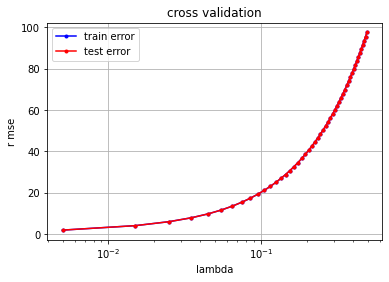

In [12]:
cross_validation_logistic_regression(y, tx, k_fold, initial_w, max_iters, gammas)

In [13]:
cross_validation_reg_logistic_regression(y, tx, k_fold, initial_w, max_iters,lambdas, gammas)

1
2
3
3,5


ValueError: operands could not be broadcast together with shapes (250000,21) (250000,) 